## MPOX OUTBREAK EDA: EUROPE AND THE AMERICAS

### Introduction

- In 2022–2023, an unprecedented outbreak of mpox (previously monkeypox) affected people andcommunities in 112 countries.
- According to the WHO, a novel feature of this outbreak was sustained person-to-person transmission through sexual contact. 
- Majority of cases in newly affected countries were linked to the sexual networks of gay,bisexual and other men who have sex with men, which also affected trans and gender-diverse people.
- Most cases reported globally were in Europe and the Americas.
- This EDA will try to uncover insights from this period using publically available data.

### 1. Import libraries

In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### 2. Read data

In [23]:
#Import MPox daily data
mpox_daily = pd.read_csv('Data/mpox-daily-confirmed-cases world wide.csv')
mpox_daily.shape

(997, 3)

### 3. Overview of MPox worldwide since 2022

In [24]:
mpox_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      997 non-null    object 
 1   Day          997 non-null    object 
 2   Daily cases  997 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [25]:
mpox_daily.describe().T

count        mean         std   min    25%    50%     75%  \
Daily cases  997.0  123.062257  210.700729  0.57  22.57  52.71  101.57   

                 max  
Daily cases  1122.71

#### a) Mpox 7 day average Mpox confirmed cases

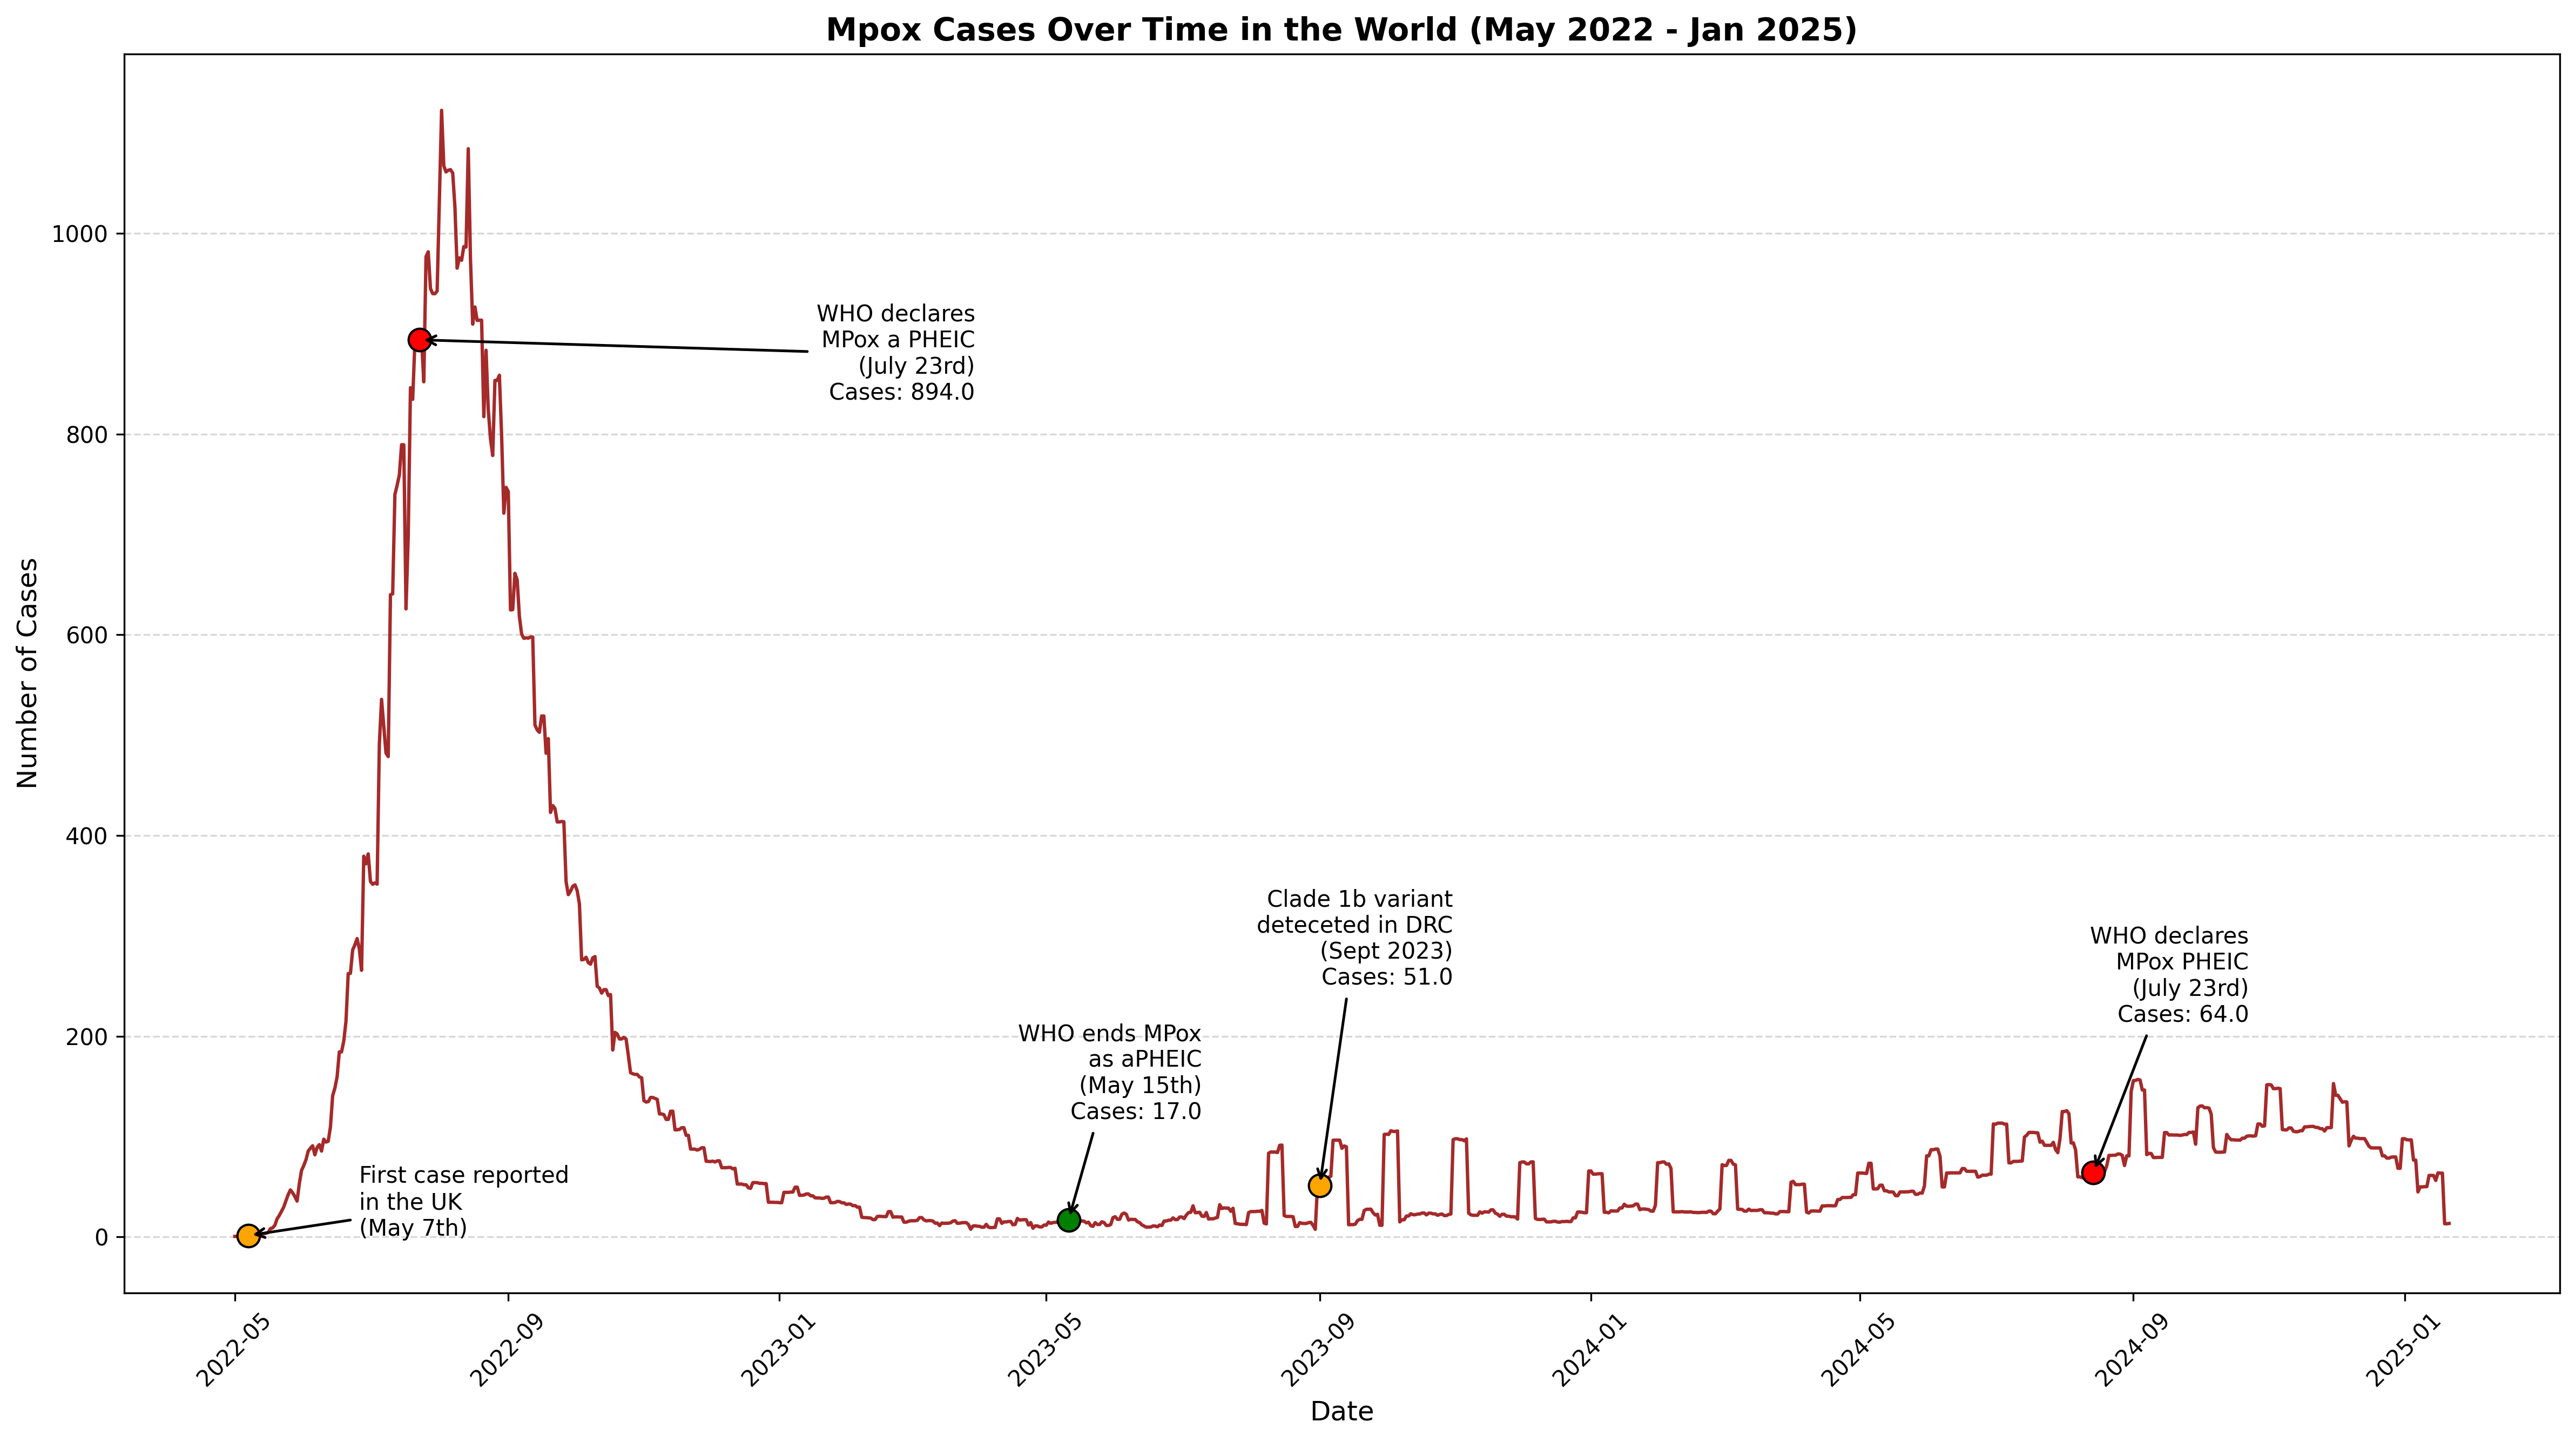

In [26]:
# Ensure 'Day' is in datetime format
mpox_daily['Day'] = pd.to_datetime(mpox_daily['Day'])

# Aggregate daily cases
mpox_daily_wrld = mpox_daily.groupby('Day')['Daily cases'].sum()

# Convert to DataFrame (optional)
mpox_daily_wrld = pd.DataFrame(mpox_daily_wrld)

# Define key events
event_date1 = pd.to_datetime('2022-05-07')  # First UK case
event_label1 = "First case reported\nin the UK\n(May 7th)"

event_date2 = pd.to_datetime('2022-07-23')  # WHO declares PHEIC
event_label2 = "WHO declares\nMPox a PHEIC\n(July 23rd)"

event_date3 = pd.to_datetime('2023-05-11')  # WHO declares PHEIC
event_label3 = "WHO ends MPox\n as aPHEIC\n(May 15th)"

event_date4 = pd.to_datetime('2023-09-01')  # WHO declares PHEIC
event_label4 = "Clade 1b variant\ndeteceted in DRC\n(Sept 2023)"

event_date5 = pd.to_datetime('2024-08-14')  # WHO declares PHEIC
event_label5 = "WHO declares\nMPox PHEIC\n(July 23rd)"

# Plot
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
ax.plot(mpox_daily_wrld.index, mpox_daily_wrld['Daily cases'], linestyle='-', color='brown', linewidth=1.5)

# Add markers with better visibility
ax.scatter(event_date1, mpox_daily_wrld.loc[event_date1, 'Daily cases'], 
           color='orange', edgecolors='black', s=100, zorder=3)
ax.scatter(event_date2, mpox_daily_wrld.loc[event_date2, 'Daily cases'], 
           color='red', edgecolors='black', s=100, zorder=3)
ax.scatter(event_date3, mpox_daily_wrld.loc[event_date3, 'Daily cases'], 
           color='green', edgecolors='black', s=100, zorder=3)
ax.scatter(event_date4, mpox_daily_wrld.loc[event_date4, 'Daily cases'], 
           color='orange', edgecolors='black', s=100, zorder=3)
ax.scatter(event_date5, mpox_daily_wrld.loc[event_date5, 'Daily cases'], 
           color='red', edgecolors='black', s=100, zorder=3)           
#Annotate
ax.annotate(event_label1, 
            xy=(event_date1, mpox_daily_wrld.loc[event_date1, 'Daily cases']),  # Point location
            xytext=(event_date1 + pd.Timedelta(days=50),  # Move label 20 days forward (Right)
                    mpox_daily_wrld.loc[event_date1, 'Daily cases'] + 0),  # Move label 300 units up
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='left')

# Annotate event 2 with the number of cases
cases_at_event2 = mpox_daily_wrld.loc[event_date2, 'Daily cases'].round()
ax.annotate(f'{event_label2}\nCases: {cases_at_event2}', 
            xy=(event_date2, cases_at_event2),  # Point location
            xytext=(event_date2 + pd.Timedelta(days=250),  # Move label 15 days backward (Left)
                    cases_at_event2 - 60),  # Move label 200 units down
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='right')
# Annotate event 3 with the number of cases
cases_at_event3 = mpox_daily_wrld.loc[event_date3, 'Daily cases'].round()
ax.annotate(f'{event_label3}\nCases: {cases_at_event3}', 
            xy=(event_date3, cases_at_event3),  # Point location
            xytext=(event_date3 + pd.Timedelta(days=60),  # Move label 15 days backward (Left)
                    cases_at_event3 + 100),  # Move label 200 units down
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='right')
cases_at_event4 = mpox_daily_wrld.loc[event_date4, 'Daily cases'].round()
ax.annotate(f'{event_label4}\nCases: {cases_at_event4}', 
            xy=(event_date4, cases_at_event4),  # Point location
            xytext=(event_date4 + pd.Timedelta(days=60),  # Move label 15 days backward (Left)
                    cases_at_event4 + 200),  # Move label 200 units down
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='right')
cases_at_event5 = mpox_daily_wrld.loc[event_date5, 'Daily cases'].round()
ax.annotate(f'{event_label5}\nCases: {cases_at_event5}', 
            xy=(event_date5, cases_at_event5),  # Point location
            xytext=(event_date5 + pd.Timedelta(days=70),  # Move label 15 days backward (Left)
                    cases_at_event5 + 150),  # Move label 200 units down
            arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
            fontsize=10, color='black', ha='right')
# Formatting
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Cases", fontsize=12)
ax.set_title("Mpox Cases Over Time in the World (May 2022 - Jan 2025)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
ax.tick_params(axis='x', rotation=45)

# Improve grid aesthetics
ax.grid(axis='y',linestyle='dashed', alpha=0.5)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig("Plots/Mpox Cases Over Time in the World (May 2022 - Jan 2025).png", dpi=300, bbox_inches='tight')

plt.show()


**Major events since 2022 Mpox outbreak**
- 7th May, 2022: The first case of mpox in europe(UK).
- 22nd July, 2022: WHO declares a Public Health Emergency of International Concern after seeing a rise in cases
- 15th May 2023: WHO declares an end PHEIC
- Sep 2023: Clade 1b variant is detected in the DRC
- July 2024: WHO declares mpox a PHEIC for the second time


### b) Chloropleth of Infections May 2025 - Date

In [27]:
# Read file geo
geo_df = gpd.read_file('Data/country_shapes.geojson')
geo_df = geo_df[['cntry_name', 'geometry','iso3']]
geo_df.to_file("Data/geometry_df.geojson", driver="GeoJSON")

In [28]:
# Read geo_df and full_df
geo_df = gpd.read_file('Data/geometry_df.geojson') # read geojson
full_df = pd.read_csv('Data/monkeypox_data.csv', low_memory=False) #read mpox data

In [29]:
# Merge geodf left on iso_code and right on iso3
merged_geodf = full_df.merge(geo_df, how='left', left_on='iso_code', right_on='iso3')

# Compute cumulative sum per location
merged_geodf['cum_cases'] = merged_geodf.groupby('location')['new_cases'].cumsum()

# Aggregate geometry and retain the last cumulative sum of total_cases
grouped_geo = merged_geodf.groupby('location', as_index=False).agg(
    total_cases=('cum_cases', 'last'),  # Get the latest cumulative sum per location
    geometry=('geometry', 'first')  # Keep the first geometry per location
)

# Drop rows where geometry is missing
grouped_geo = grouped_geo.dropna(subset=['geometry'])

# Convert to GeoDataFrame (if it's not already)
grouped_geo = gpd.GeoDataFrame(grouped_geo, geometry='geometry')

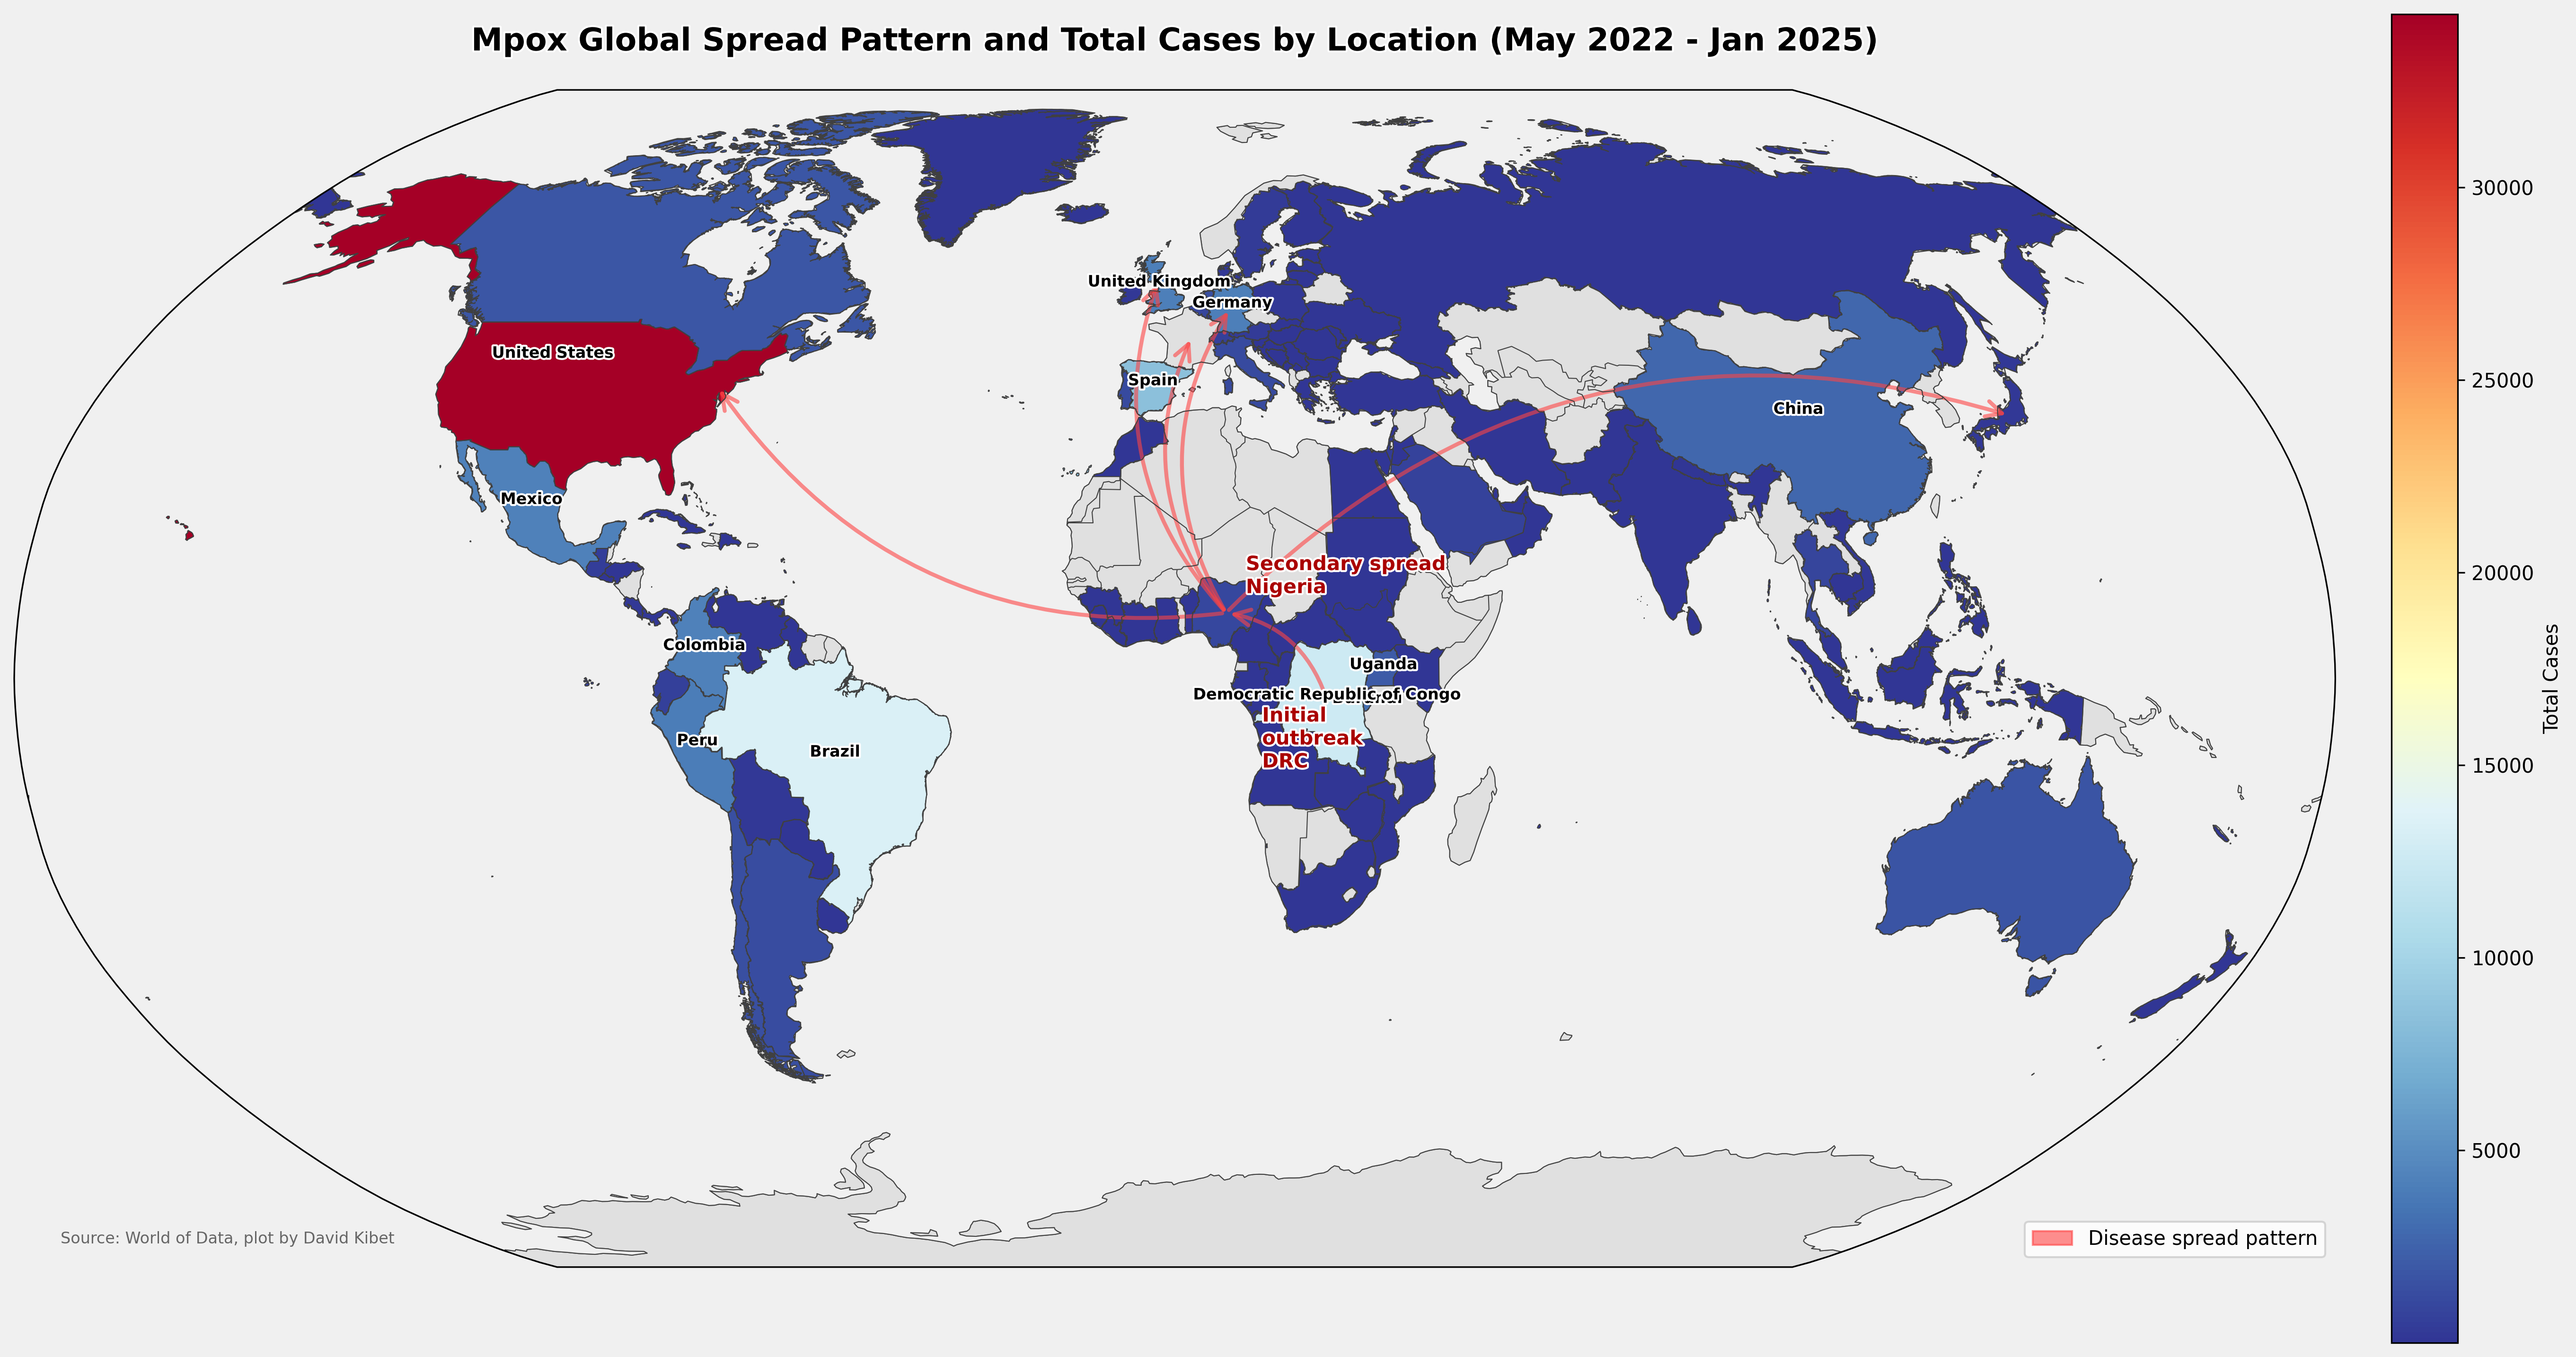

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import FancyArrowPatch
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set the CRS for the input data (assuming it's in standard lat/lon coordinates)
grouped_geo = grouped_geo.set_crs(epsg=4326)

# Create figure and axis with a specific background color and projection
fig, ax = plt.subplots(1, 1, figsize=(20, 12), 
                       subplot_kw={'projection': ccrs.Robinson()}, 
                       dpi=300)
fig.patch.set_facecolor('#F0F0F0')
ax.set_facecolor('#F0F0F0')

# Add natural earth features
ax.add_feature(cfeature.LAND, facecolor='#E0E0E0', edgecolor='#404040', linewidth=0.5)
ax.add_feature(cfeature.OCEAN, facecolor='#F0F0F0')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='#404040')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='#404040')

# Transform to Robinson projection
grouped_geo_robinson = grouped_geo.to_crs(ccrs.Robinson().proj4_init)

# Plot the choropleth with data on top
grouped_geo_robinson.plot(
    column='total_cases',
    cmap='RdYlBu_r',
    legend=True,
    legend_kwds={
        'label': 'Total Cases',
        'orientation': 'vertical',
        'shrink': 0.8,
        'format': '%.0f',
        'pad': 0.02,
    },
    ax=ax,
    transform=ccrs.Robinson(),
    edgecolor='#404040',
    linewidth=0.5
)

# Function to create curved arrow in projected coordinates
def curved_arrow(start, end, ax, direction=1):
    # Transform coordinates to projection space
    start_proj = ccrs.Robinson().transform_point(start[0], start[1], ccrs.PlateCarree())
    end_proj = ccrs.Robinson().transform_point(end[0], end[1], ccrs.PlateCarree())
    
    arrow = FancyArrowPatch(
        start_proj,
        end_proj,
        connectionstyle=f"arc3,rad={0.3 * direction}",
        color='#FF4444',
        alpha=0.6,
        linewidth=2,
        arrowstyle='->',
        mutation_scale=20,
        transform=ax.transData
    )
    ax.add_patch(arrow)

# Define key locations (longitude, latitude)
drc_location = (23.6, -2.9)  # Democratic Republic of the Congo
nigeria_location = (8.0, 9.0)  # Nigeria
global_locations = [
    (-3.0, 55.0),  # UK
    (3.0, 47.0),   # France
    (-77.0, 40.0), # USA
    (10.0, 51.0),  # Germany
    (138.0, 36.0)  # Japan
]

# Add arrows showing spread
# DRC to Nigeria
curved_arrow(drc_location, nigeria_location, ax, 1)

# Nigeria to global locations
for loc in global_locations:
    curved_arrow(nigeria_location, loc, ax, -1)

# Add annotations with transformed coordinates
def add_annotation(location, text):
    x, y = ccrs.Robinson().transform_point(location[0], location[1], ccrs.PlateCarree())
    ax.annotate(text, 
                (x, y),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                color='#AA0000',
                path_effects=[PathEffects.withStroke(linewidth=2, foreground='white')])

add_annotation((10.6, -14.9), 'Initial\noutbreak\nDRC')
add_annotation(nigeria_location, 'Secondary spread\nNigeria')

# Enhance the title
title = ax.set_title('Mpox Global Spread Pattern and Total Cases by Location (May 2022 - Jan 2025)',
                    pad=20,
                    size=16,
                    weight='bold',
                    fontfamily='sans-serif')
title.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Add labels for locations with high case numbers (top 10%)
for idx, row in grouped_geo_robinson.iterrows():
    if row['total_cases'] > grouped_geo_robinson['total_cases'].quantile(0.9):
        centroid = row.geometry.centroid
        ax.text(centroid.x, centroid.y,
                row['location'], fontsize=8, ha='center',
                color='black', fontweight='bold',
                transform=ccrs.Robinson(),
                path_effects=[PathEffects.withStroke(linewidth=2, foreground='white')])

# Add a source note
plt.text(0.02, 0.02, 'Source: World of Data, plot by David Kibet',
         transform=ax.transAxes,
         fontsize=8,
         color='#666666')

# Add a legend for the arrows
arrow_legend = plt.matplotlib.patches.Patch(color='#FF4444', alpha=0.6, label='Disease spread pattern')
handles, labels = ax.get_legend_handles_labels()
handles.append(arrow_legend)
ax.legend(handles=handles, loc='lower right', fontsize=10)

# Set map bounds
ax.set_global()

# Adjust layout
plt.tight_layout()

# save image
plt.savefig("Plots/Mpox Global Spread Pattern and Total Cases by Location (May 2022 - Jan 2025).png", dpi=300, bbox_inches='tight')

# Show the map
plt.show()

 **Global spread pattern**
- Historical Mpox cases were first reported in the DRC(Central African Region), from sporadic cases in the rural areas.
- In DRC, shift from primarily zoonotic to human to human transmission. 
- Major outbreak reported in Nigeria in 2017-2018, establishing a secondary reservior in West Africa, different clade from the West African region.
- First cases were reported in Europe in May, 2022.
- Spread to Americas, Asia and Oceania regions.

### c) MPox confirmed cases and comfirmed deaths May 2022- May 2023

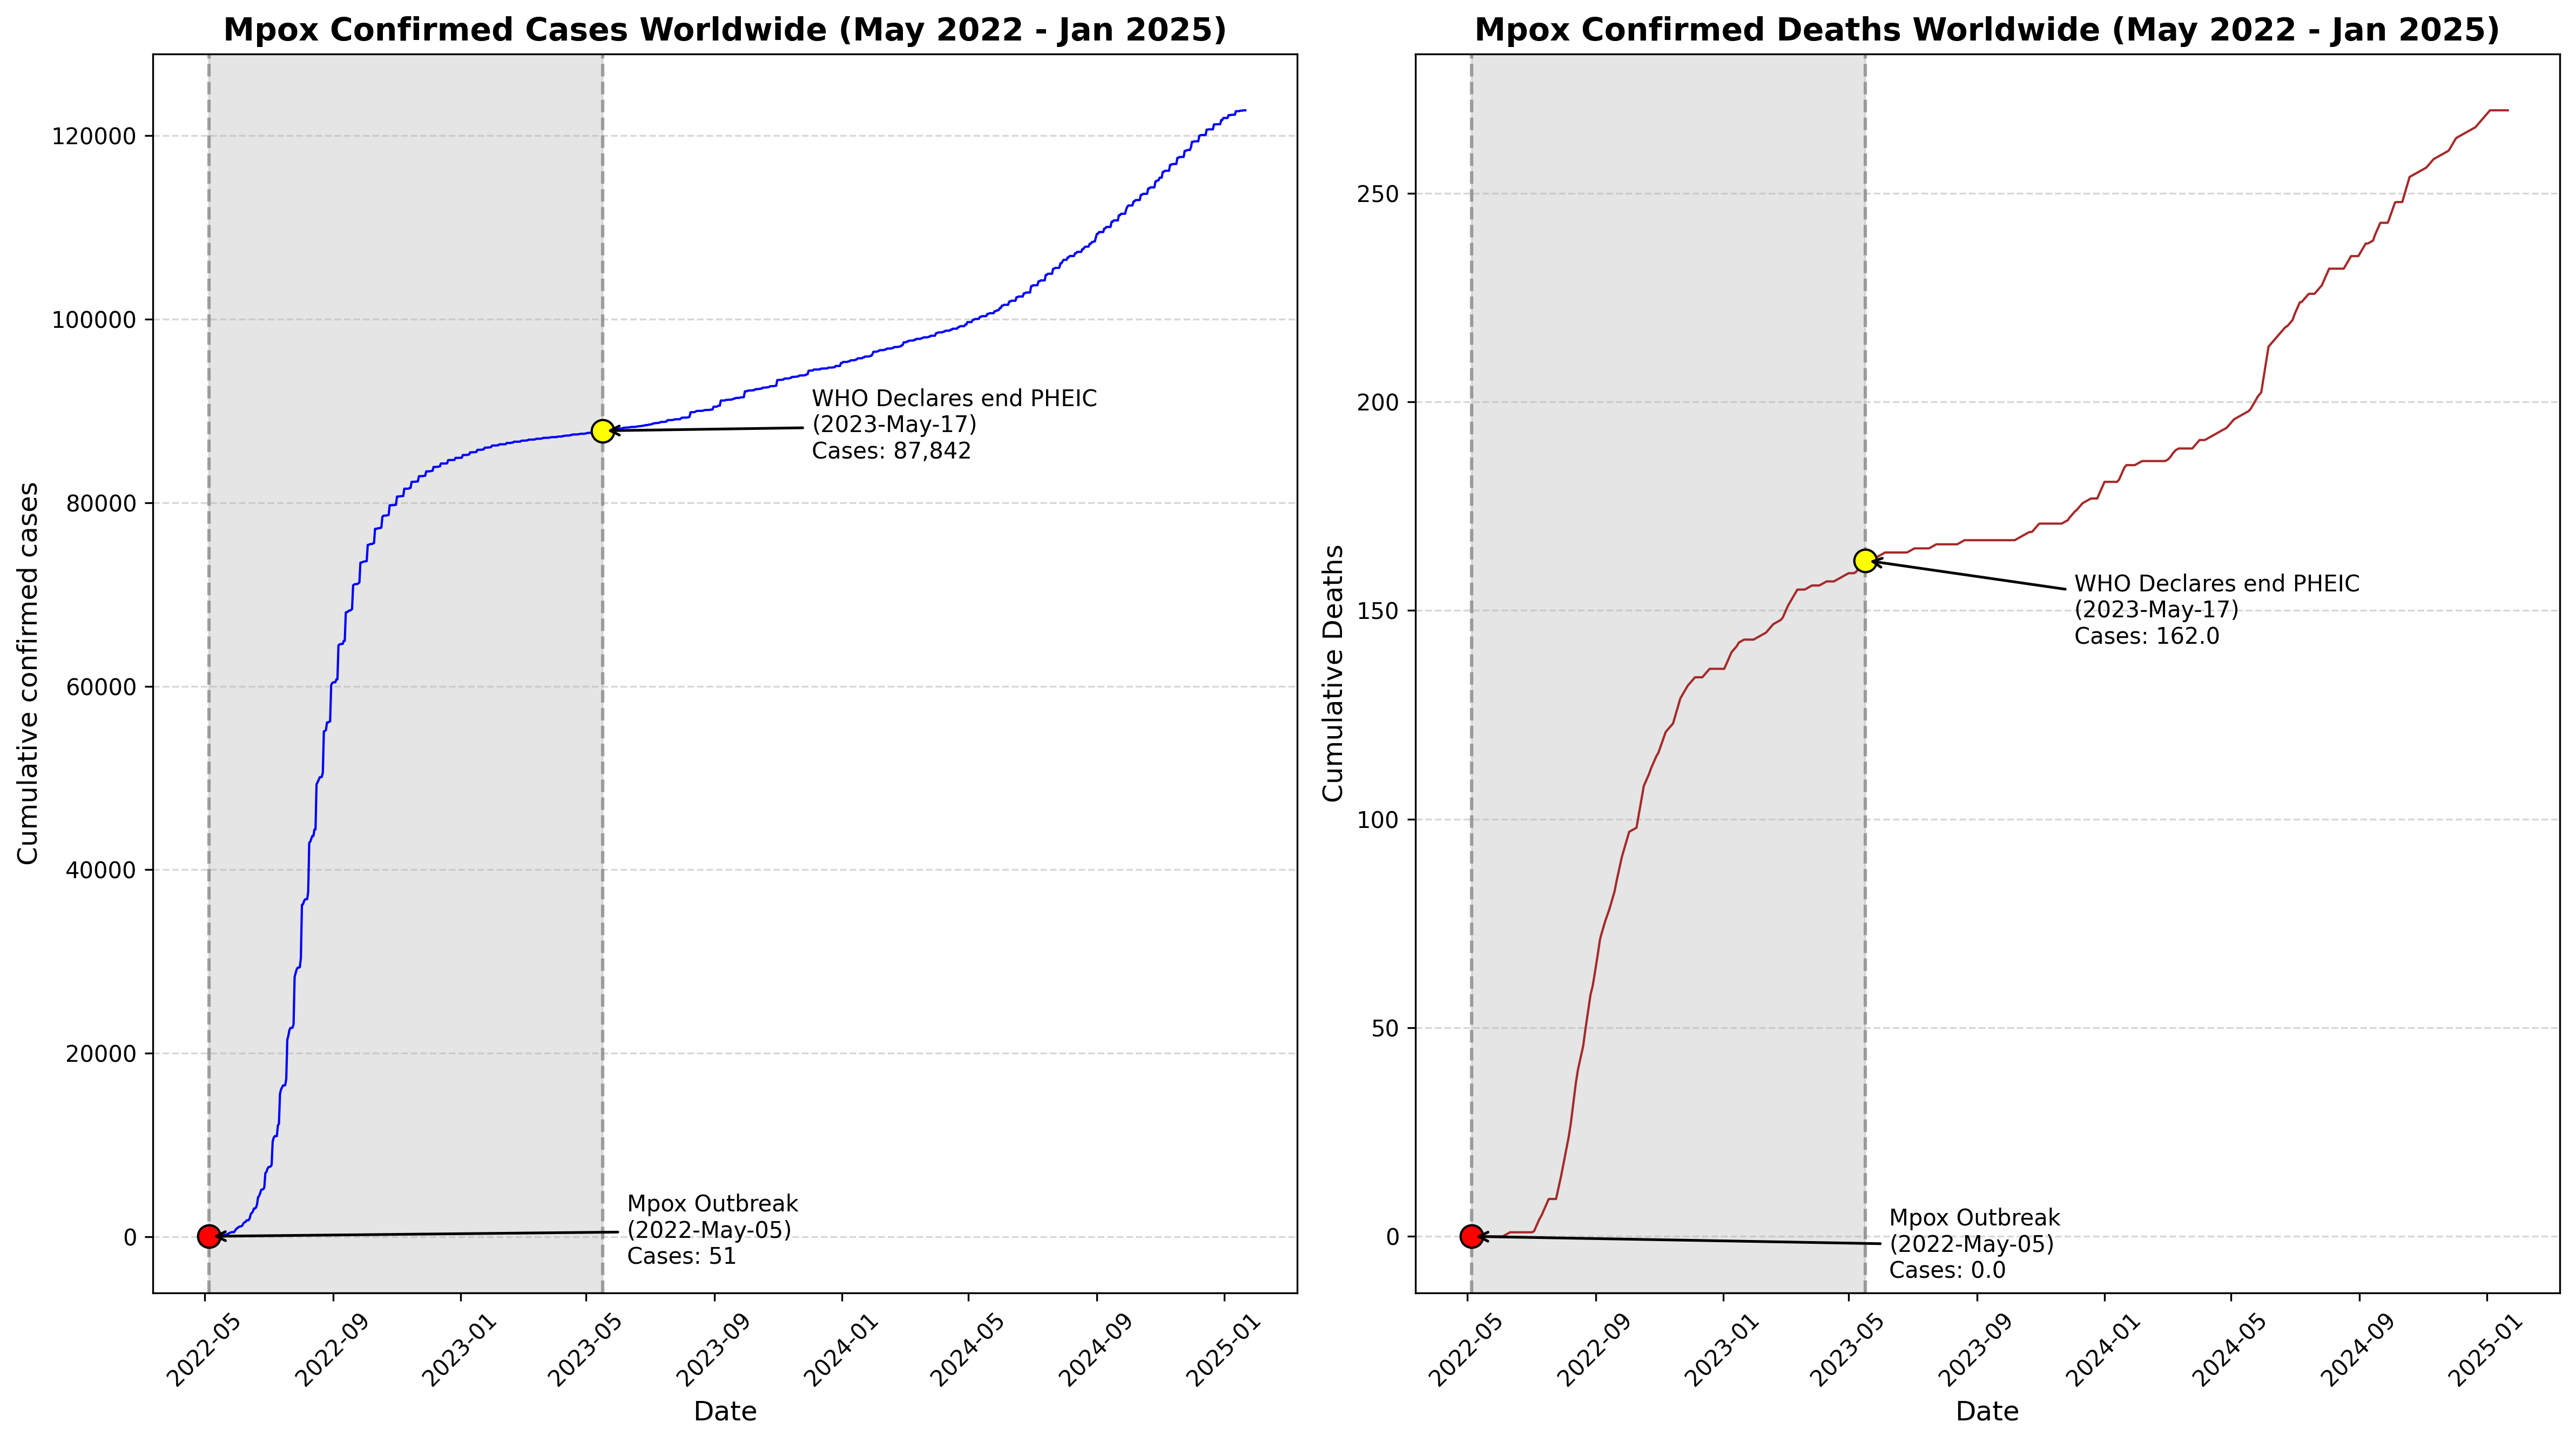

In [31]:
# Load the data
mpox_deaths_df = pd.read_csv('Data/mpox-daily-confirmed-deaths.csv')
mpox_confirmed_df = pd.read_csv('Data/mpox-cumulative-confirmed-and-suspected-cases.csv')

# Compute cumulative deaths
mpox_deaths_df['Cumulative_deaths'] = mpox_deaths_df['Daily deaths'].cumsum()

# Convert 'Day' column to datetime
mpox_deaths_df['Day'] = pd.to_datetime(mpox_deaths_df['Day'])
mpox_confirmed_df['Day'] = pd.to_datetime(mpox_confirmed_df['Day'])

# Group by Day and get total cases/deaths
mpox_deaths_world = mpox_deaths_df.groupby('Day')['Cumulative_deaths'].sum().reset_index()
mpox_confirmed_world = mpox_confirmed_df.groupby('Day')['Total confirmed cases'].sum().reset_index()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 9), dpi=300)

# Plot confirmed cases
ax[0].plot(mpox_confirmed_world['Day'], mpox_confirmed_world['Total confirmed cases'], 
           linestyle='-', color='blue', linewidth=1)

# Plot cumulative deaths
ax[1].plot(mpox_deaths_world['Day'], mpox_deaths_world['Cumulative_deaths'], 
           linestyle='-', color='brown', linewidth=1)

# Label axes and titles
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylabel("Cumulative confirmed cases", fontsize=12)
ax[0].set_title("Mpox Confirmed Cases Worldwide (May 2022 - Jan 2025)", fontsize=14, fontweight='bold')

ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylabel("Cumulative Deaths", fontsize=12)
ax[1].set_title("Mpox Confirmed Deaths Worldwide (May 2022 - Jan 2025)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

# Improve grid aesthetics
ax[0].grid(axis='y',linestyle='dashed', alpha=0.5)
ax[1].grid(axis='y',linestyle='dashed', alpha=0.5)

## Axis[0] when WHO declares end of PHEIC
# Annotate WHO's Public Health Emergency of International Concern (PHEIC) declaration
event_date = pd.to_datetime('2023-05-17')  
event_label = "WHO Declares end PHEIC\n(2023-May-17)"

# Get y-value for annotation safely
event_cases_row = mpox_confirmed_world[mpox_confirmed_world['Day'] == event_date]

if not event_cases_row.empty:
    event_cases = event_cases_row['Total confirmed cases'].values[0]

    # Scatter point on the plot
    ax[0].scatter(event_date, event_cases, color='yellow', edgecolors='black', s=100, zorder=3)

    # Annotate with event label and case count
    annotation_text = f"{event_label}\nCases: {event_cases:,}"  # Format number with comma

    ax[0].annotate(annotation_text,  
                   xy=(event_date, event_cases),  
                   xytext=(event_date + pd.Timedelta(days=200), event_cases - 3000),  
                   arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
                   fontsize=10, color='black', ha='left')

## Axis[0] when WHO declares Mpox Outbreak
event_date3 = pd.to_datetime('2022-05-05')  
event_label3 = "Mpox Outbreak\n(2022-May-05)"

# Get y-value for annotation safely
event_cases_row3 = mpox_confirmed_world[mpox_confirmed_world['Day'] == event_date3]

if not event_cases_row3.empty:
    event_cases3 = event_cases_row3['Total confirmed cases'].values[0]

    # Scatter point on the plot
    ax[0].scatter(event_date3, event_cases3, color='red', edgecolors='black', s=100, zorder=3)

    # Annotate with event label and case count
    annotation_text = f"{event_label3}\nCases: {event_cases3:,}"  # Format number with comma

    ax[0].annotate(annotation_text,  
                   xy=(event_date3, event_cases3),  
                   xytext=(event_date3 + pd.Timedelta(days=400), event_cases3 - 3000),  
                   arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
                   fontsize=10, color='black', ha='left')
## Axis[1] when WHO declares end of PHEIC
event_date2 = pd.to_datetime('2023-05-17')  
event_label2 = "WHO Declares end PHEIC\n(2023-May-17)"
# Get y-value for annotation safely
event_cases_row2 = mpox_deaths_world[mpox_deaths_world['Day'] == event_date]
if not event_cases_row2.empty:
    event_cases2 = (event_cases_row2['Cumulative_deaths'].values[0]).round()

    # Scatter point on the plot
    ax[1].scatter(event_date2, event_cases2, color='yellow', edgecolors='black', s=100, zorder=3)

    # Annotate with event label and case count
    annotation_text = f"{event_label2}\nCases: {event_cases2:,}"  # Format number with comma

    ax[1].annotate(annotation_text,  
                   xy=(event_date2, event_cases2),  
                   xytext=(event_date2 + pd.Timedelta(days=200), event_cases2 - 20),  
                   arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
                   fontsize=10, color='black', ha='left')
## Axis[0] when WHO declares Mpox outbreak
event_date4 = pd.to_datetime('2022-05-05')  
event_label4 = "Mpox Outbreak\n(2022-May-05)"
# Get y-value for annotation safely
event_cases_row4 = mpox_deaths_world[mpox_deaths_world['Day'] == event_date4]
if not event_cases_row4.empty:
    event_cases4 = (event_cases_row4['Cumulative_deaths'].values[0]).round()

    # Scatter point on the plot
    ax[1].scatter(event_date4, event_cases4, color='red', edgecolors='black', s=100, zorder=3)

    # Annotate with event label and case count
    annotation_text = f"{event_label4}\nCases: {event_cases4:,}"  # Format number with comma

    ax[1].annotate(annotation_text,  
                   xy=(event_date4, event_cases4),  
                   xytext=(event_date4 + pd.Timedelta(days=400), event_cases4 - 10),  
                   arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.2),
                   fontsize=10, color='black', ha='left')
# Add vertical dashed lines to mark the start and end of the period
# Highlight the period of interest with a shaded area
ax[0].axvspan(pd.to_datetime('2022-05-05'), pd.to_datetime('2023-05-17'), 
              color='gray', alpha=0.2)  # Adjust alpha for transparency

ax[1].axvspan(pd.to_datetime('2022-05-05'), pd.to_datetime('2023-05-17'), 
              color='gray', alpha=0.2)

# Add vertical dashed lines to mark the start and end of the period
ax[0].axvline(pd.to_datetime('2022-05-05'), color='gray', linestyle='dashed', linewidth=1.5, alpha=0.7)
ax[0].axvline(pd.to_datetime('2023-05-17'), color='gray', linestyle='dashed', linewidth=1.5, alpha=0.7)

ax[1].axvline(pd.to_datetime('2022-05-05'), color='gray', linestyle='dashed', linewidth=1.5, alpha=0.7)
ax[1].axvline(pd.to_datetime('2023-05-17'), color='gray', linestyle='dashed', linewidth=1.5, alpha=0.7)
# Adjust layout and show plot
plt.tight_layout()
plt.savefig("Plots/Mpox cumulative confirmed cases and deaths worldwide (May 2022 - Jan 2025).png", dpi=300, bbox_inches='tight')
plt.show()


**Mpox cases and deaths between May 2022 and May 2023**
- Between May 2022 and May 2023, Mpox had recorded 87,842 cumulative cases and 162 reported deaths worldwide.
- By may 2022 however cases had started going down and WHO declared end of PHEIC.
- This one year period will form the basis of our discussion.

### d) Top 5 countries in the world with the highest number of total cases in the world from May 7th 2022 to May 15th 2023

Shape of df_filtered: (37070, 17)


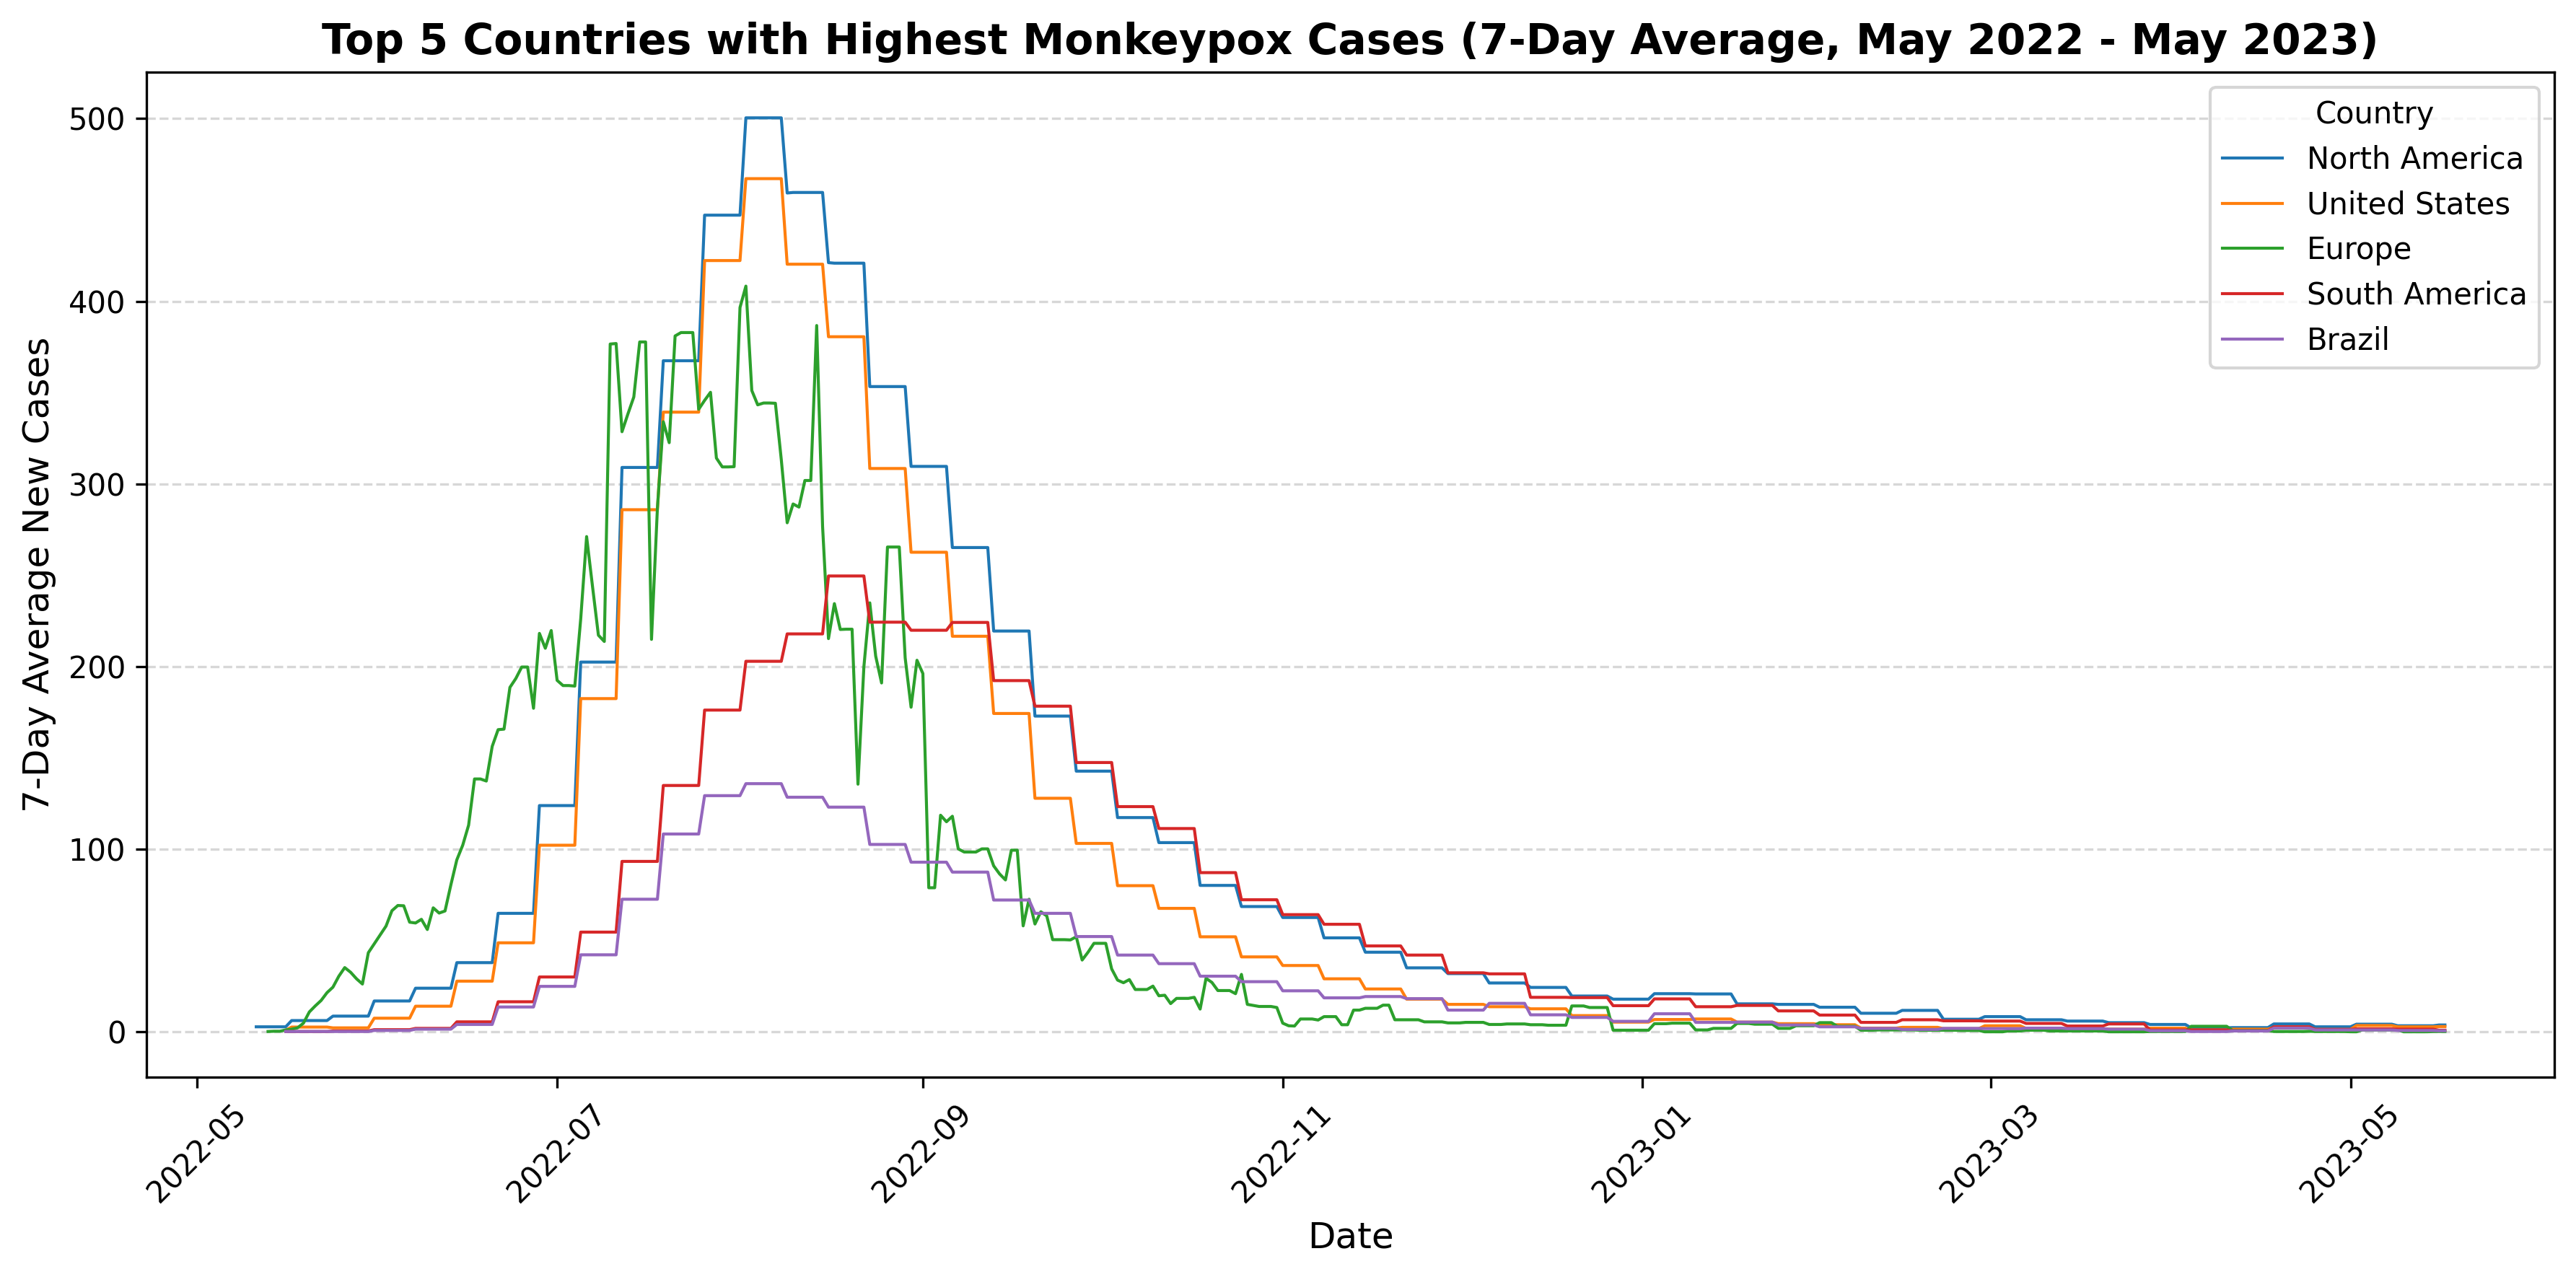

In [32]:
# Load data
df = pd.read_csv('Data/monkeypox_data.csv', low_memory=False)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define time range
start_date = '2022-05-05'
end_date = '2023-05-17'

# Filter data within the time range
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
print(f'Shape of df_filtered: {df_filtered.shape}')

# Sum of cases by country
cases_by_location = df_filtered.groupby('location', as_index=False)['new_cases'].sum()

# Get top 5 countries with the highest cases
# top_5_countries = cases_by_location.sort_values(by='new_cases', ascending=False).head([1:6])['location'].tolist()
# Instead of dropping, just select index 1 to 5
top_5_countries = cases_by_location.sort_values(by='new_cases', ascending=False).iloc[1:6]['location'].tolist()

# Filter data for only these top 5 countries
df_top5 = df_filtered[df_filtered['location'].isin(top_5_countries)]

# Group by date and location
df_top5_grouped = df_top5.groupby(['date', 'location'], as_index=False)['new_cases'].sum()

# Apply 7-day moving average
df_top5_grouped['7_day_avg'] = df_top5_grouped.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())

# Plot
plt.figure(figsize=(12, 6), dpi=300)

# Plot each country with a different color
for country in top_5_countries:
    country_data = df_top5_grouped[df_top5_grouped['location'] == country]
    plt.plot(country_data['date'], country_data['7_day_avg'], label=country, linewidth=1)

# Labels and title
plt.xlabel("Date", fontsize=12)
plt.ylabel("7-Day Average New Cases", fontsize=12)
plt.title("Top 5 Countries with Highest Monkeypox Cases (7-Day Average, May 2022 - May 2023)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Grid for better visualization
plt.grid(axis='y',linestyle='dashed', alpha=0.5)

# Add legend
plt.legend(title="Country", fontsize=10)

# Show plot
plt.tight_layout()
plt.savefig("Plots/Top 5 Countries with Highest Monkeypox Cases (7-Day Average, May 2022 - May 2023).png", dpi=300, bbox_inches='tight')
plt.show()


**Highest Mpox cases in countries**
- North America had the highest number of reported cases peaking in August of 2022
- United states also experienced a similar pattern to North America but had a lower peak
- Cases in Europe peaked ealier and started going down earlier 


### e) Cumulative Mpox Cases and deaths overtime

Shape of df_filtered: (37070, 17)


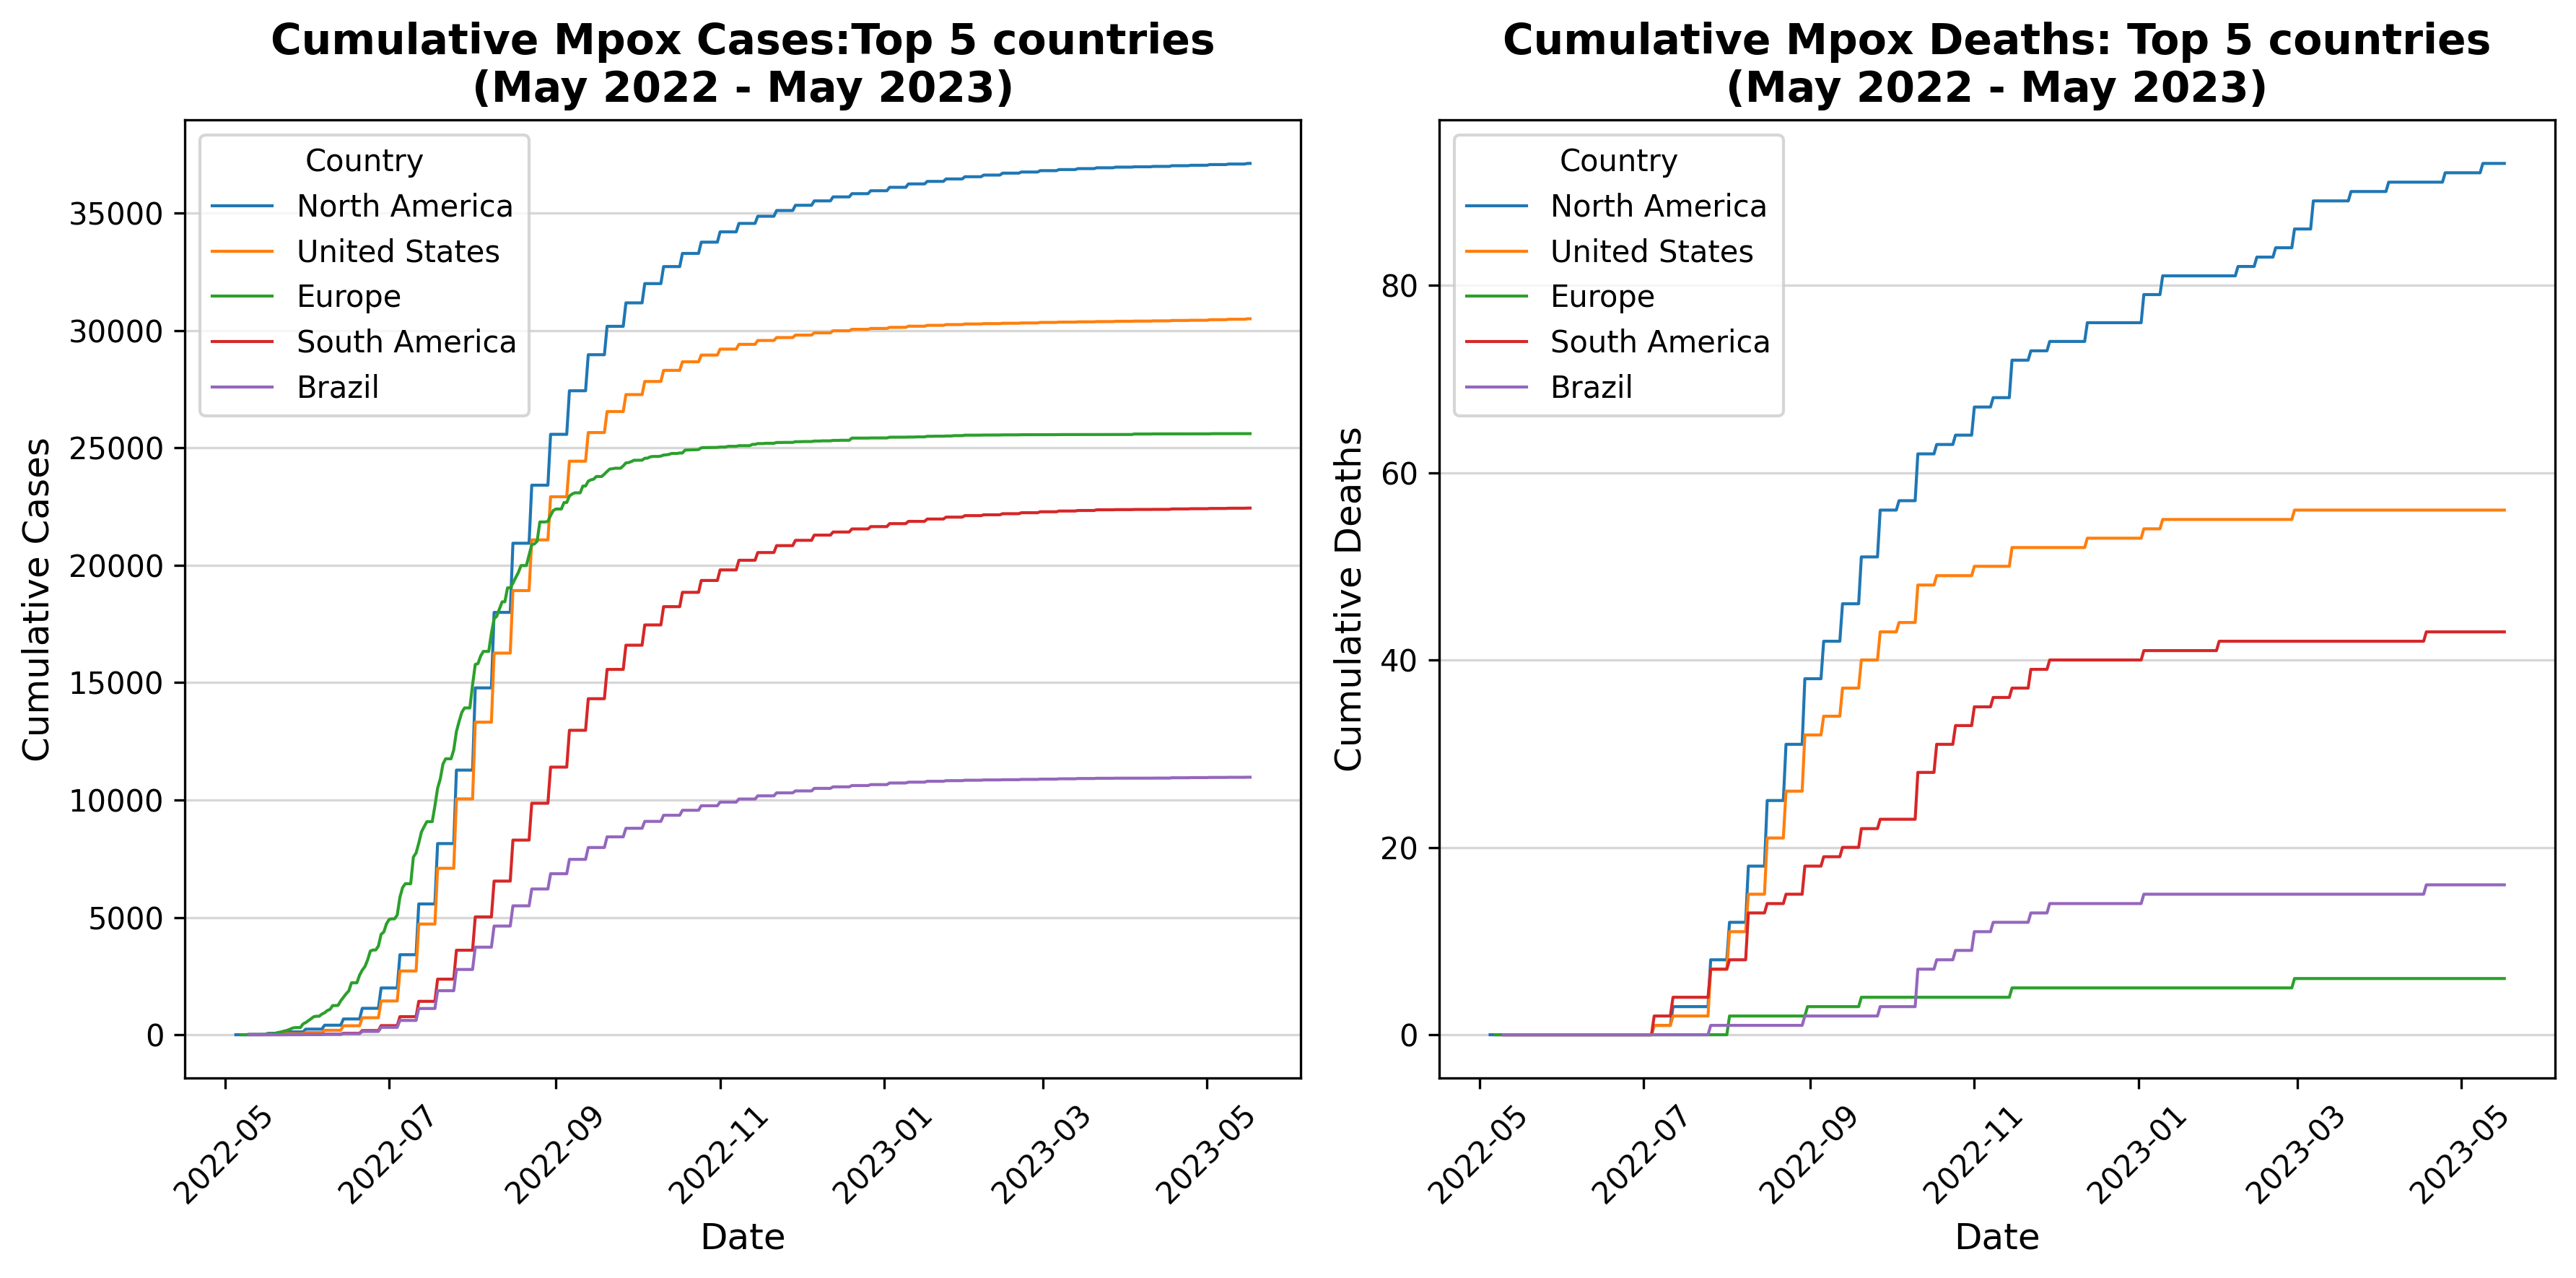

In [33]:
# Filter dataset within the date range
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
print(f'Shape of df_filtered: {df_filtered.shape}')

# Aggregate total cases per country
cases_by_location = df_filtered.groupby('location', as_index=False)['new_cases'].sum()

# Sort and get the top 5 countries excluding the highest one
sorted_cases = cases_by_location.sort_values(by='new_cases', ascending=False)
top_5_countries = sorted_cases.iloc[1:6]['location'].tolist()  # Excluding the highest

# Filter dataset for the selected top 5 countries
df_top5 = df_filtered[df_filtered['location'].isin(top_5_countries)]

# Sort by date to compute cumulative sum properly
df_top5 = df_top5.sort_values(by=['location', 'date'])

# Compute cumulative sum of cases per country
df_top5['cumulative_cases'] = df_top5.groupby('location')['new_cases'].cumsum()

# Plot cumulative cases over time for the top 5 countries
fig, ax =plt.subplots(1,2, figsize=(12, 6), dpi=300)

for country in top_5_countries:
    country_data = df_top5[df_top5['location'] == country]
    ax[0].plot(country_data['date'], country_data['cumulative_cases'], label=country, linewidth=1)

# Formatting
ax[0].set_xlabel('Date', fontsize=12)
ax[0].set_ylabel('Cumulative Cases', fontsize=12)
ax[0].set_title('Cumulative Mpox Cases:Top 5 countries\n(May 2022 - May 2023)', fontsize=14, fontweight='bold')
ax[0].legend(title="Country")
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y',alpha=0.5)

# Compute cumulative sum of cases per country
df_top5['cumulative_cases'] = df_top5.groupby('location')['new_deaths'].cumsum()

# # Plot cumulative cases over time for the top 5 countries
# plt.figure(figsize=(12, 6))

for country in top_5_countries:
    country_data = df_top5[df_top5['location'] == country]
    ax[1].plot(country_data['date'], country_data['cumulative_cases'], label=country, linewidth=1)

# Formatting
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_ylabel('Cumulative Deaths', fontsize=12)
ax[1].set_title('Cumulative Mpox Deaths: Top 5 countries\n(May 2022 - May 2023)', fontsize=14, fontweight='bold')
ax[1].legend(title="Country")
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y',alpha=0.5)

# Tight layout
plt.tight_layout()

plt.savefig("Plots/Cumulative Mpox Deaths: Top 5 countries\n(May 2022 - May 2023).png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


**Cumulative mpox cases May 2022 - May 2023 against cumulative deaths**
- North America had the highest number of cumulative cases and also the highest number of cumulative deaths, followed by the United States
- Europe had a substansive amount of cases but the least amount of cumulative deaths within this period. Why is that?

### f) Total cases, Total deaths and Mortality rate in the top 5 affected countries (May 2022 - May 2023)

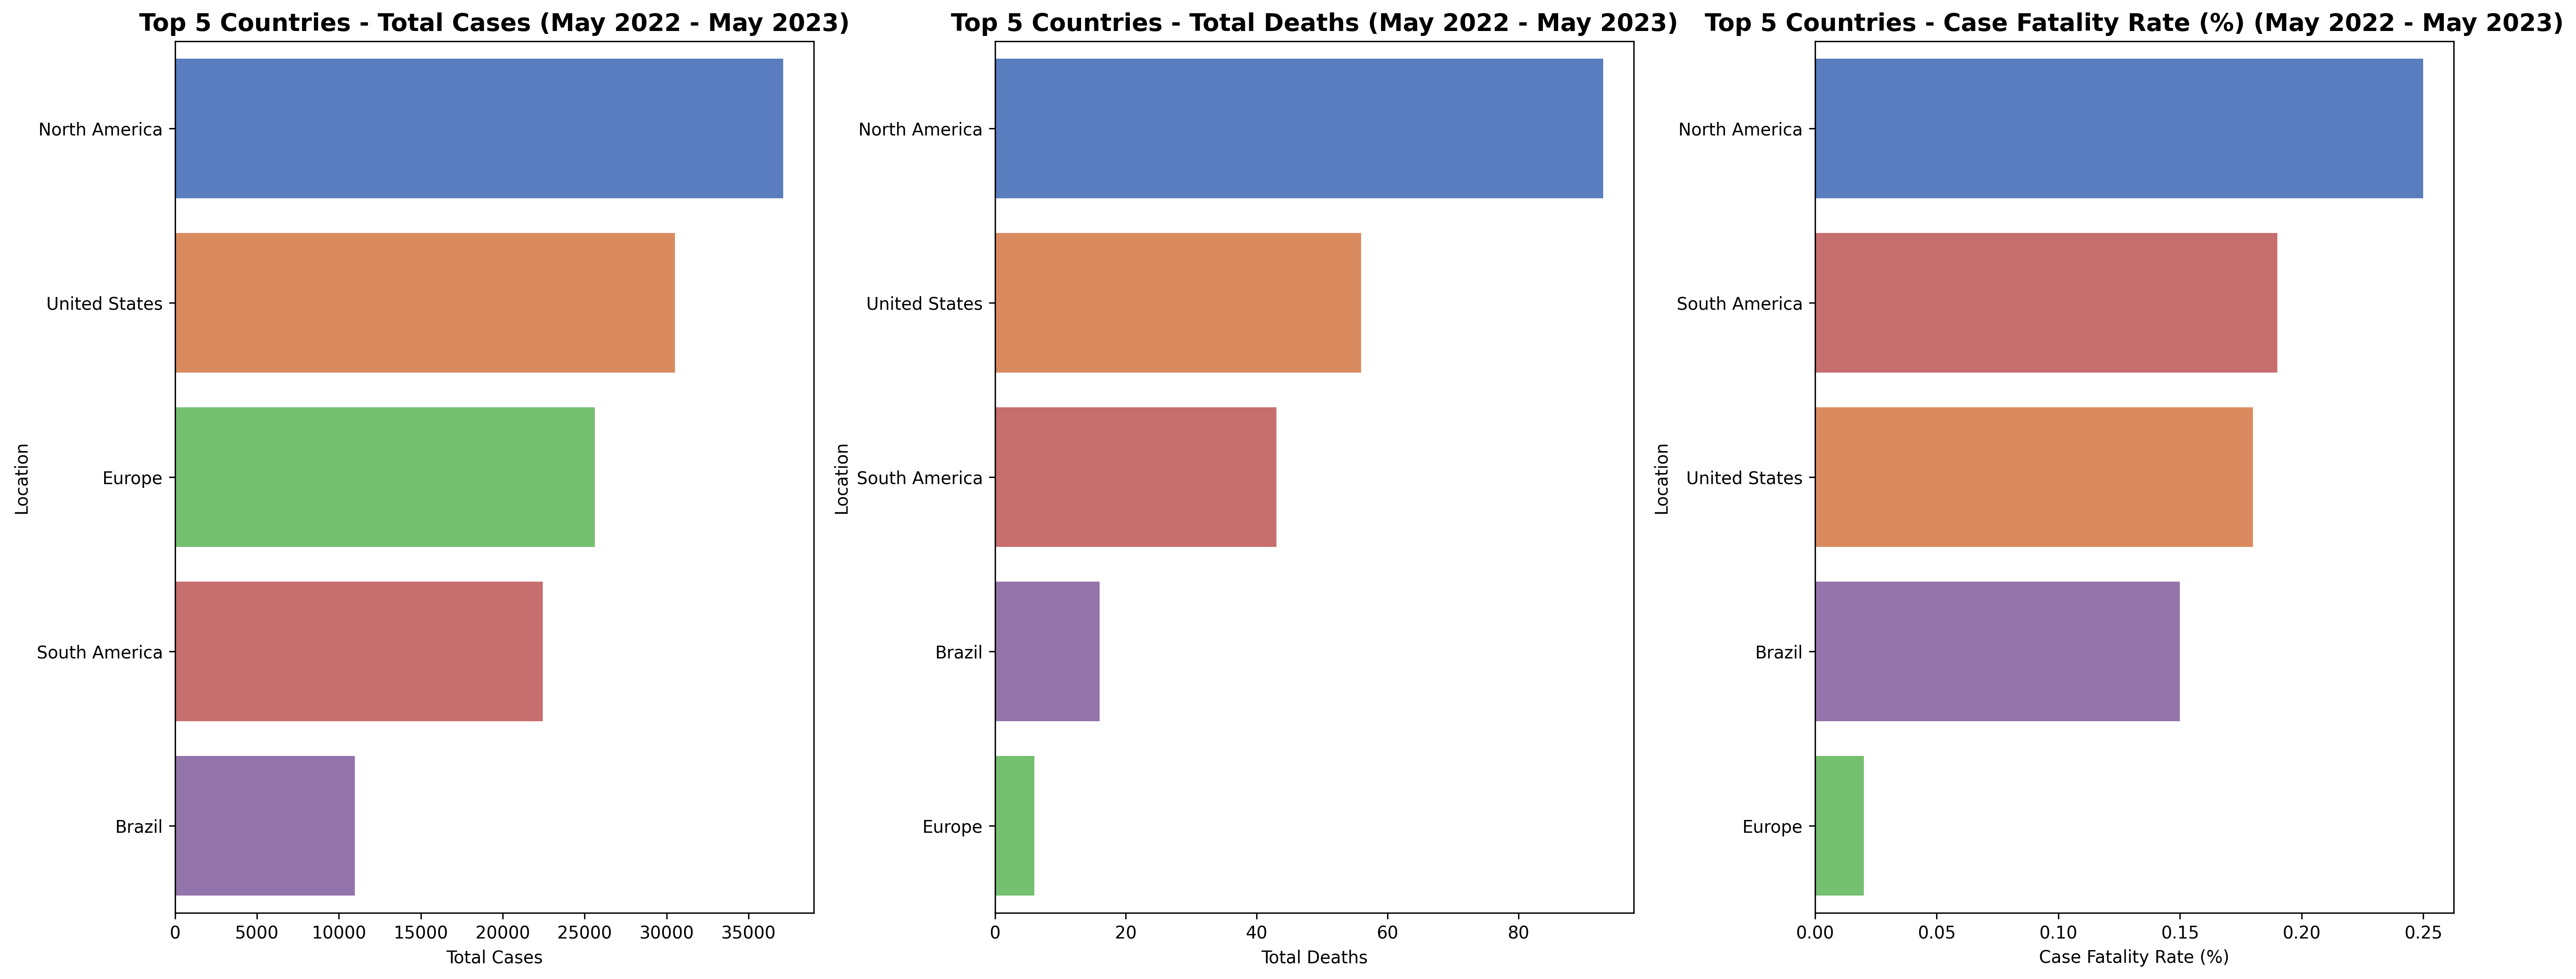


Values for top 5 countries by cases (May 2022 - May 2023):
| location      |   total_cases |   total_deaths |   case_fatality_rate |
|:--------------|--------------:|---------------:|---------------------:|
| North America |         37123 |             93 |                 0.25 |
| United States |         30504 |             56 |                 0.18 |
| Europe        |         25610 |              6 |                 0.02 |
| South America |         22439 |             43 |                 0.19 |
| Brazil        |         10972 |             16 |                 0.15 |


In [34]:
# Group data by location and aggregate
grouped_data = df_filtered.groupby('location').agg(
    total_cases=('new_cases', 'sum'),
    total_deaths=('new_deaths', 'sum')
).reset_index()  # Add reset_index() to make 'location' a regular column

# Calculate mortality rate
grouped_data['case_fatality_rate'] = (grouped_data['total_deaths'] / grouped_data['total_cases'] * 100).round(2)

# Get top 5 countries based on total cases
top_5_countries = grouped_data.sort_values(by='total_cases', ascending=False).iloc[1:6]

# Create a color palette dictionary for consistent colors
countries = top_5_countries['location'].unique()
colors = sns.color_palette('muted', n_colors=len(countries))
color_dict = dict(zip(countries, colors))

# Create figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8), dpi=300)

# Plot total cases (sorted by cases)
sns.barplot(x='total_cases', 
            y='location',
            data=top_5_countries.sort_values('total_cases', ascending=False),
            hue='location',
            palette=color_dict,
            legend=False,
            ax=ax[0])
ax[0].set_title('Top 5 Countries - Total Cases (May 2022 - May 2023)', fontweight='bold', fontsize=14)
ax[0].set_xlabel('Total Cases')
ax[0].set_ylabel('Location')

# Plot total deaths (sorted by deaths)
sns.barplot(x='total_deaths', 
            y='location',
            data=top_5_countries.sort_values('total_deaths', ascending=False),
            hue='location',
            palette=color_dict,
            legend=False,
            ax=ax[1])
ax[1].set_title('Top 5 Countries - Total Deaths (May 2022 - May 2023)', fontweight='bold', fontsize=14)
ax[1].set_xlabel('Total Deaths')
ax[1].set_ylabel('Location')

# Plot mortality rate (sorted by mortality)
sns.barplot(x='case_fatality_rate', 
            y='location',
            data=top_5_countries.sort_values('case_fatality_rate', ascending=False),
            hue='location',
            palette=color_dict,
            legend=False,
            ax=ax[2])
ax[2].set_title('Top 5 Countries - Case Fatality Rate (%) (May 2022 - May 2023)',  fontweight='bold', fontsize=14)
ax[2].set_xlabel('Case Fatality Rate (%)')
ax[2].set_ylabel('Location')

plt.tight_layout()

plt.savefig("Plots/Total cases, Total Deaths, Case Fatality Rate of Top 5 countries\n(May 2022 - May 2023).png", dpi=300, bbox_inches='tight')

plt.show()

# Print the values for each metric
print("\nValues for top 5 countries by cases (May 2022 - May 2023):")
print(top_5_countries[['location', 'total_cases', 'total_deaths', 'case_fatality_rate']].to_markdown(index=False))



**Why**
- North America had the highest Mortality rate while Europe had the least. What are the factor that could have led to this?


### g) Correlation Heatmap

#### i. Correlation heatmap of the Top 5 countries by total cases

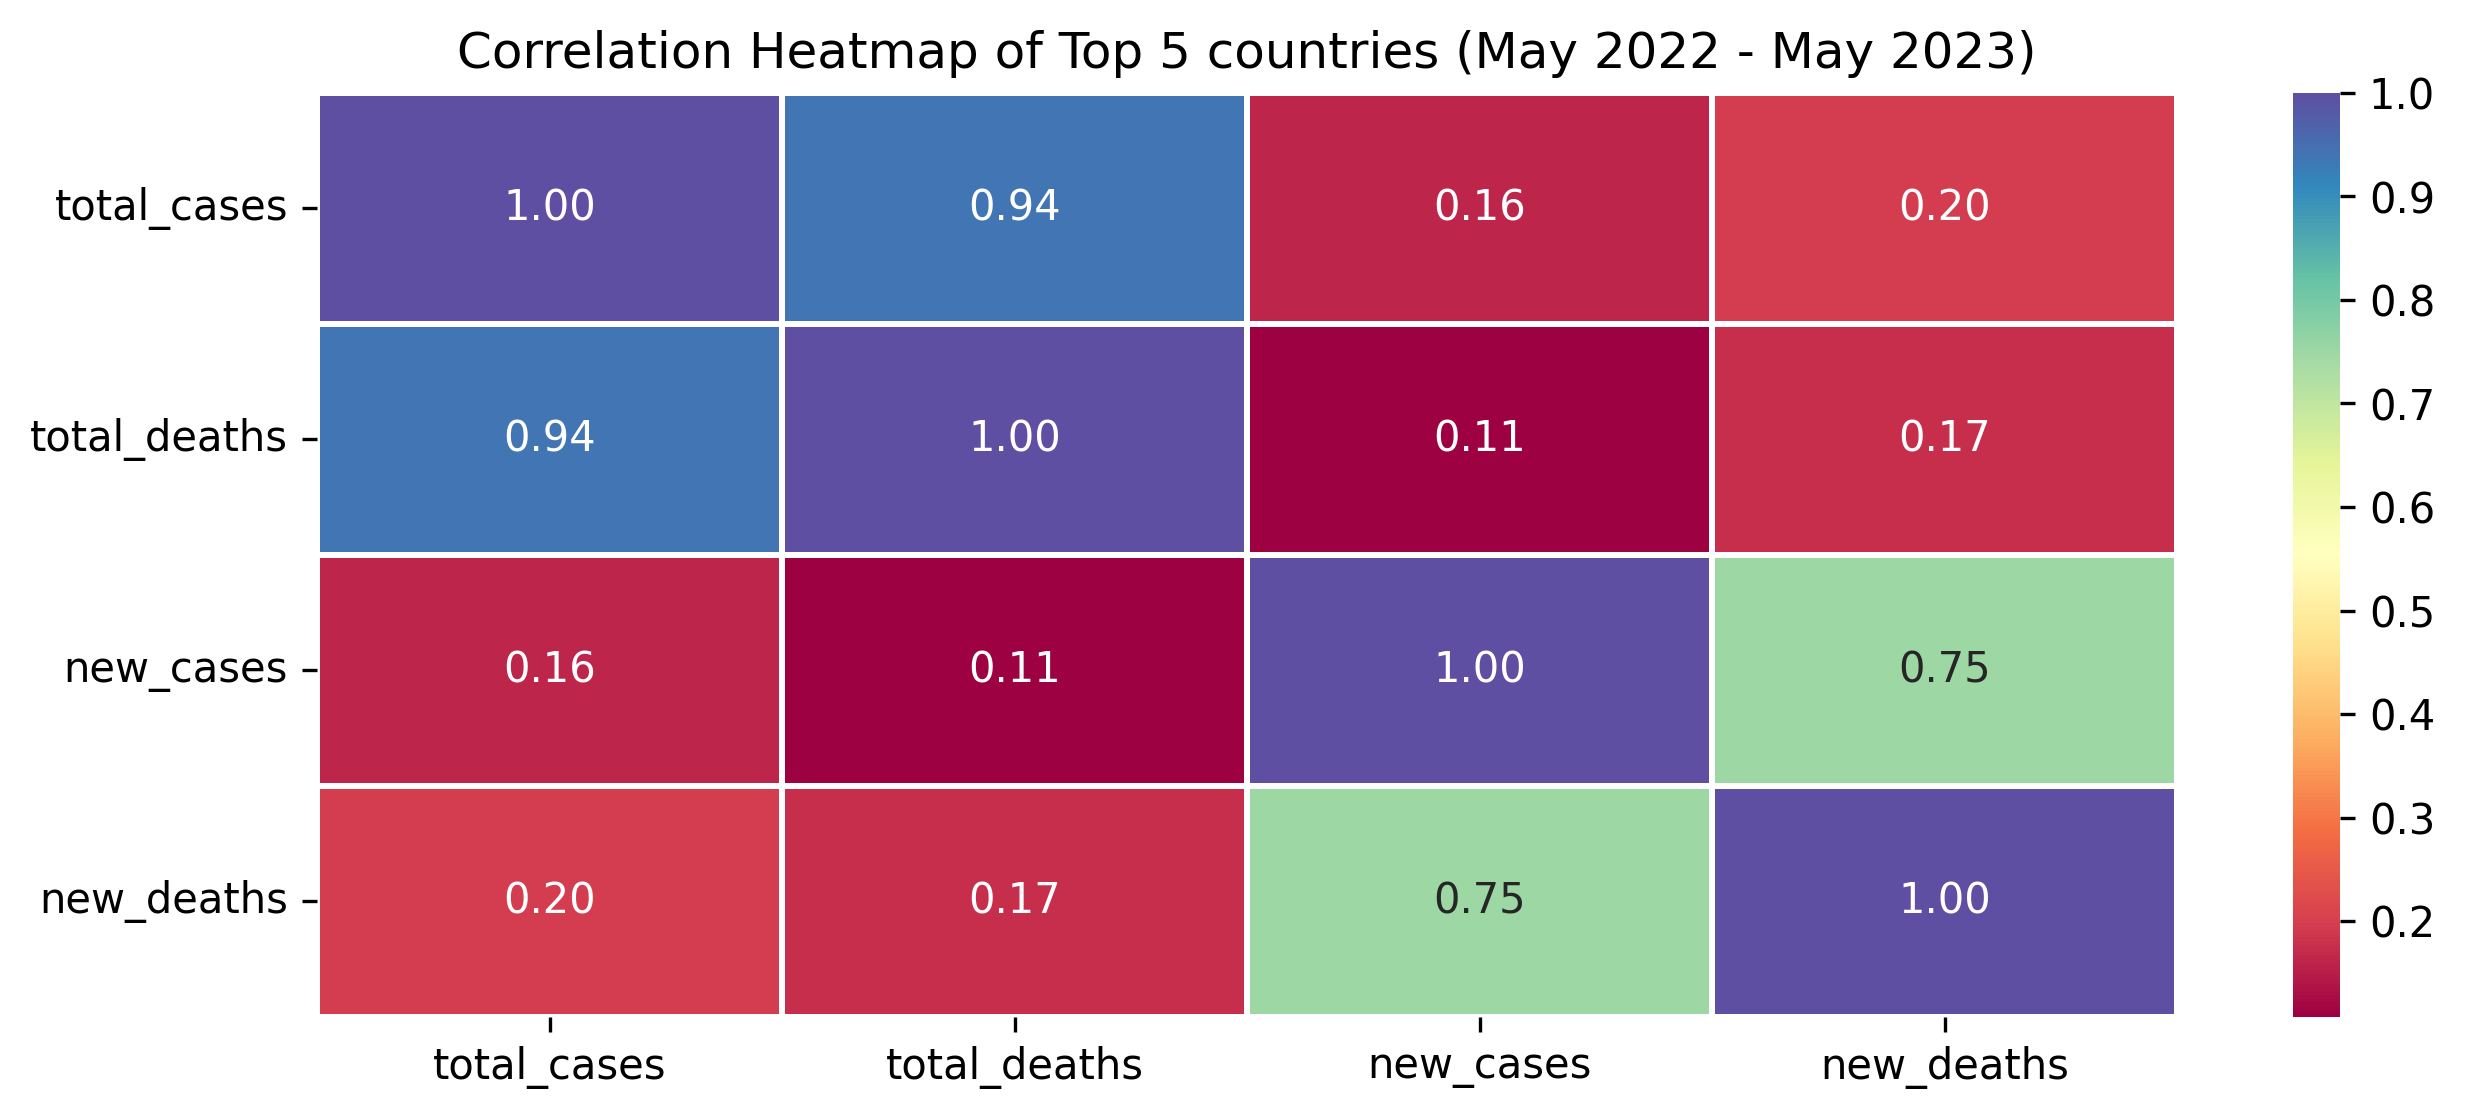

In [35]:
# Compute correlation
correlation_matrix = df_filtered[
       ['total_cases', 'total_deaths',
       'new_cases', 'new_deaths']].corr()

# Plot heatmap
plt.figure(figsize=(10, 4), dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f", linewidths=1, cbar=True)

plt.title("Correlation Heatmap of Top 5 countries (May 2022 - May 2023)")
plt.savefig("Plots/Correlation Heatmap of Top 5 countries (May 2022 - May 2023)", dpi=300, bbox_inches='tight')

plt.show()


- A higher correlation(0.94) means that total deaths are much more strongly linked to total cases than the new daily values.
This makes sense: over time, the cumulative number of deaths is tied to cumulative cases because long-term trends smooth out short-term fluctuations in deaths.
- A correlation of 0.75 indicates a strong positive relationship but not a perfect one.
When new cases rise, new deaths generally rise too, but not always proportionally due to external factors like medical interventions, reporting delays, and country-specific differences.

#### ii) Correlation heatmap of North america compared to Europe

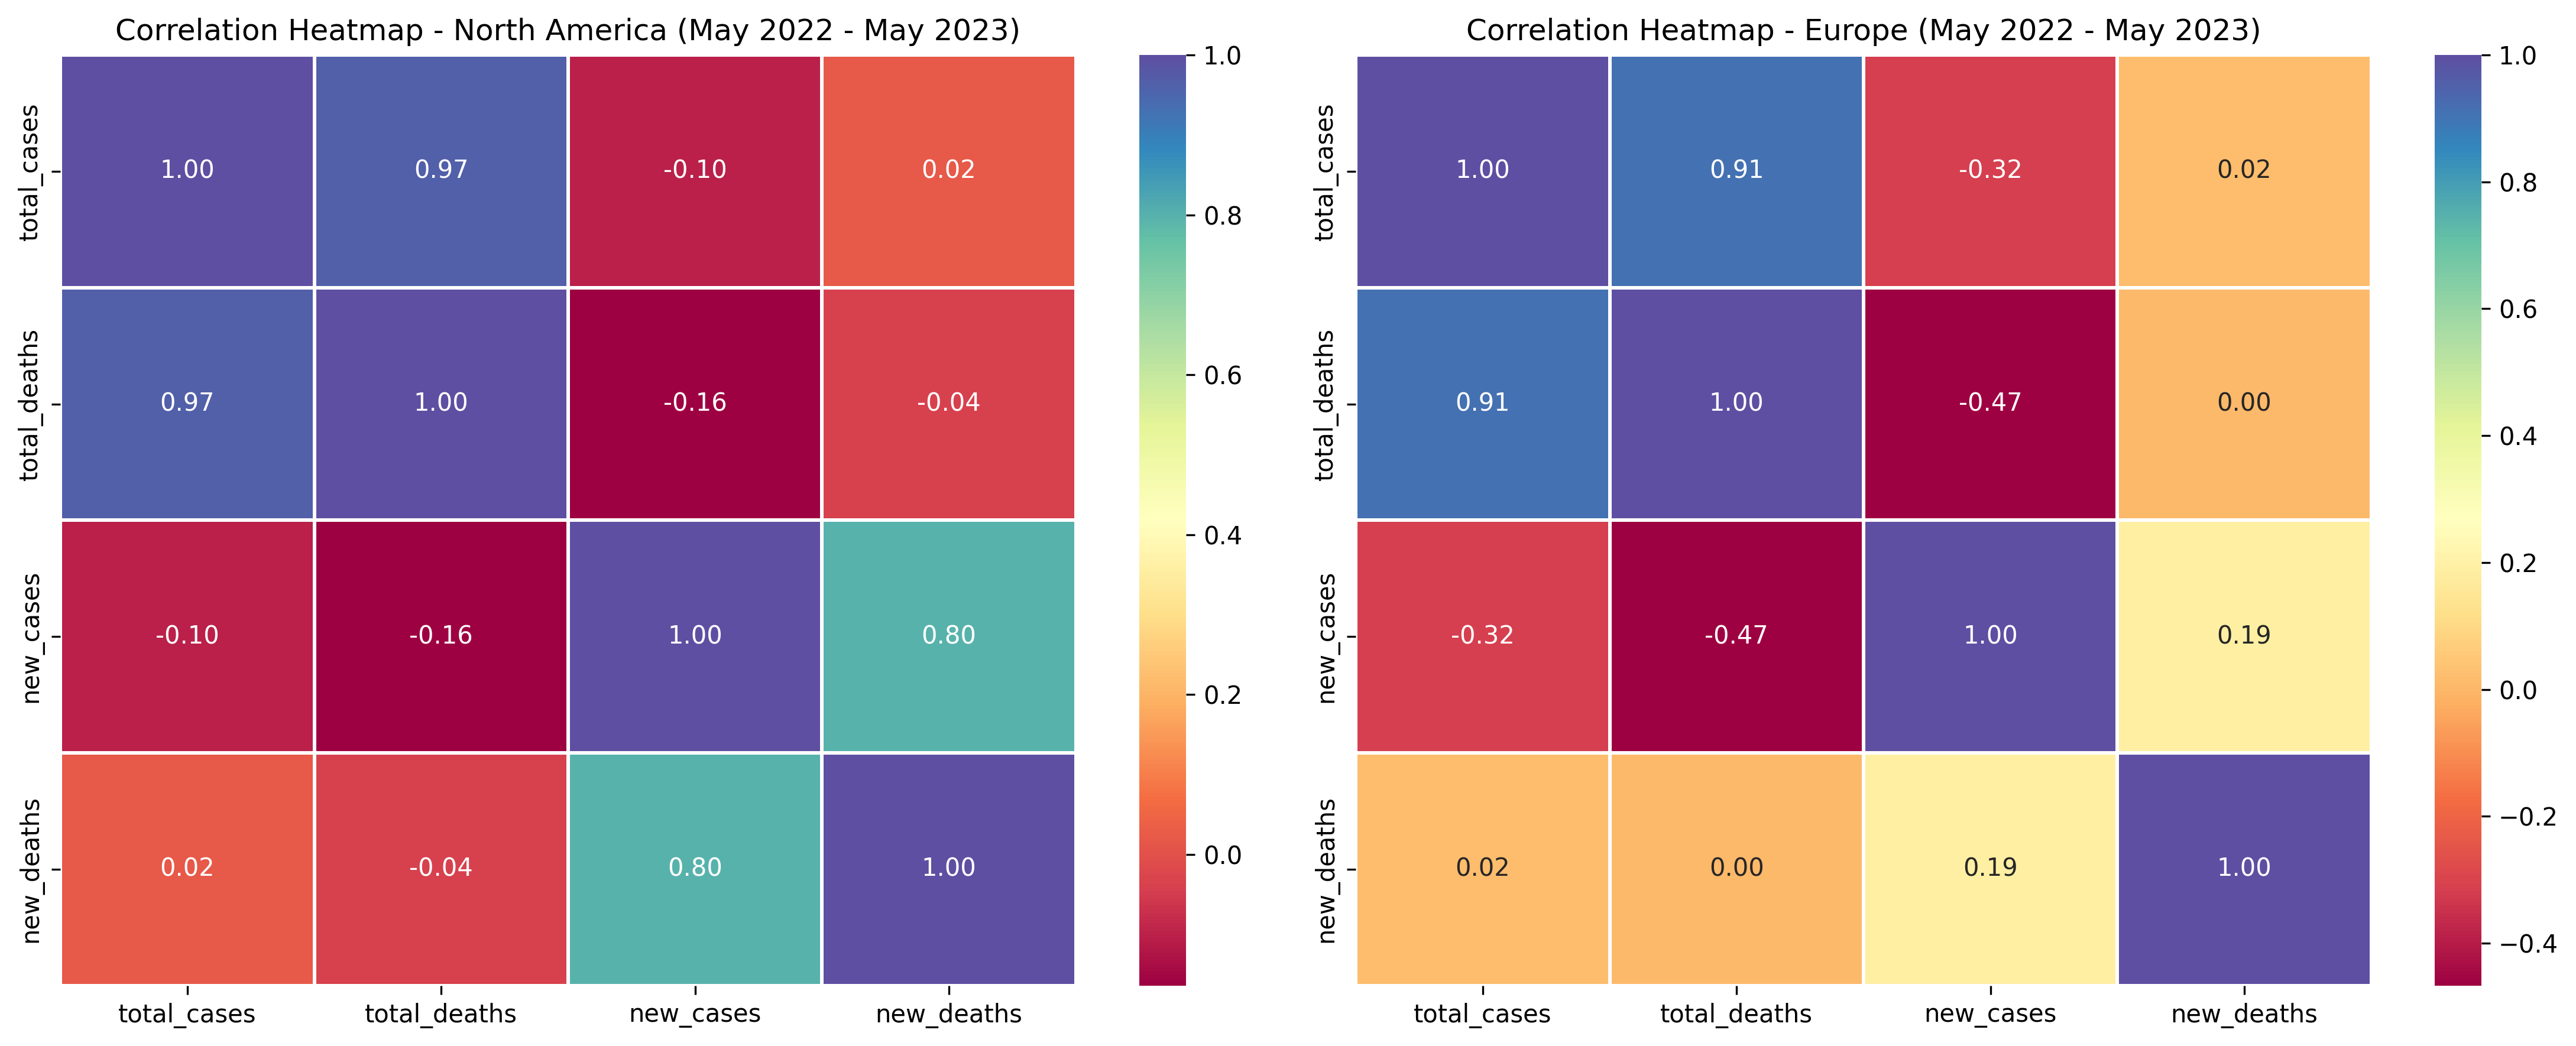

In [36]:
# Filter for North America and Europe
df_north_america = df_filtered[df_filtered['location'] == 'North America']
df_europe = df_filtered[df_filtered['location'] == 'Europe']

# Compute correlation matrices
correlation_matrix_na = df_north_america[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].corr()
correlation_matrix_europe = df_europe[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].corr()

# Plot heatmaps
fig, ax = plt.subplots(1, 2, figsize=(15, 6), dpi=300)

sns.heatmap(correlation_matrix_na, annot=True, cmap="Spectral", fmt=".2f", linewidths=1, cbar=True, ax=ax[0])
ax[0].set_title("Correlation Heatmap - North America (May 2022 - May 2023)")

sns.heatmap(correlation_matrix_europe, annot=True, cmap="Spectral", fmt=".2f", linewidths=1, cbar=True, ax=ax[1])
ax[1].set_title("Correlation Heatmap - Europe (May 2022 - May 2023)")

plt.tight_layout()

plt.savefig("Plots/Correlation Heatmap of North America and Europe (May 2022 - May 2023)", dpi=300, bbox_inches='tight')

plt.show()


**Correlation comparison**
- The correlation between the total cases and the total deaths in high both in North America(0.97) and Europe(0.91), suggesting total cases and deaths are strongly linked.
- The correlation between new cases and new deaths in North America(corr=0.84) is very high compared to Europe(corr=0.19). This suggests that in new casess in North America is strongly linked to the number of new deaths, maybe this could explain the number of high mortality rate in North Amrica as compared to Europe.

### h) Scatter Plot

#### i. Scatteplot of top 5 countries by total cases

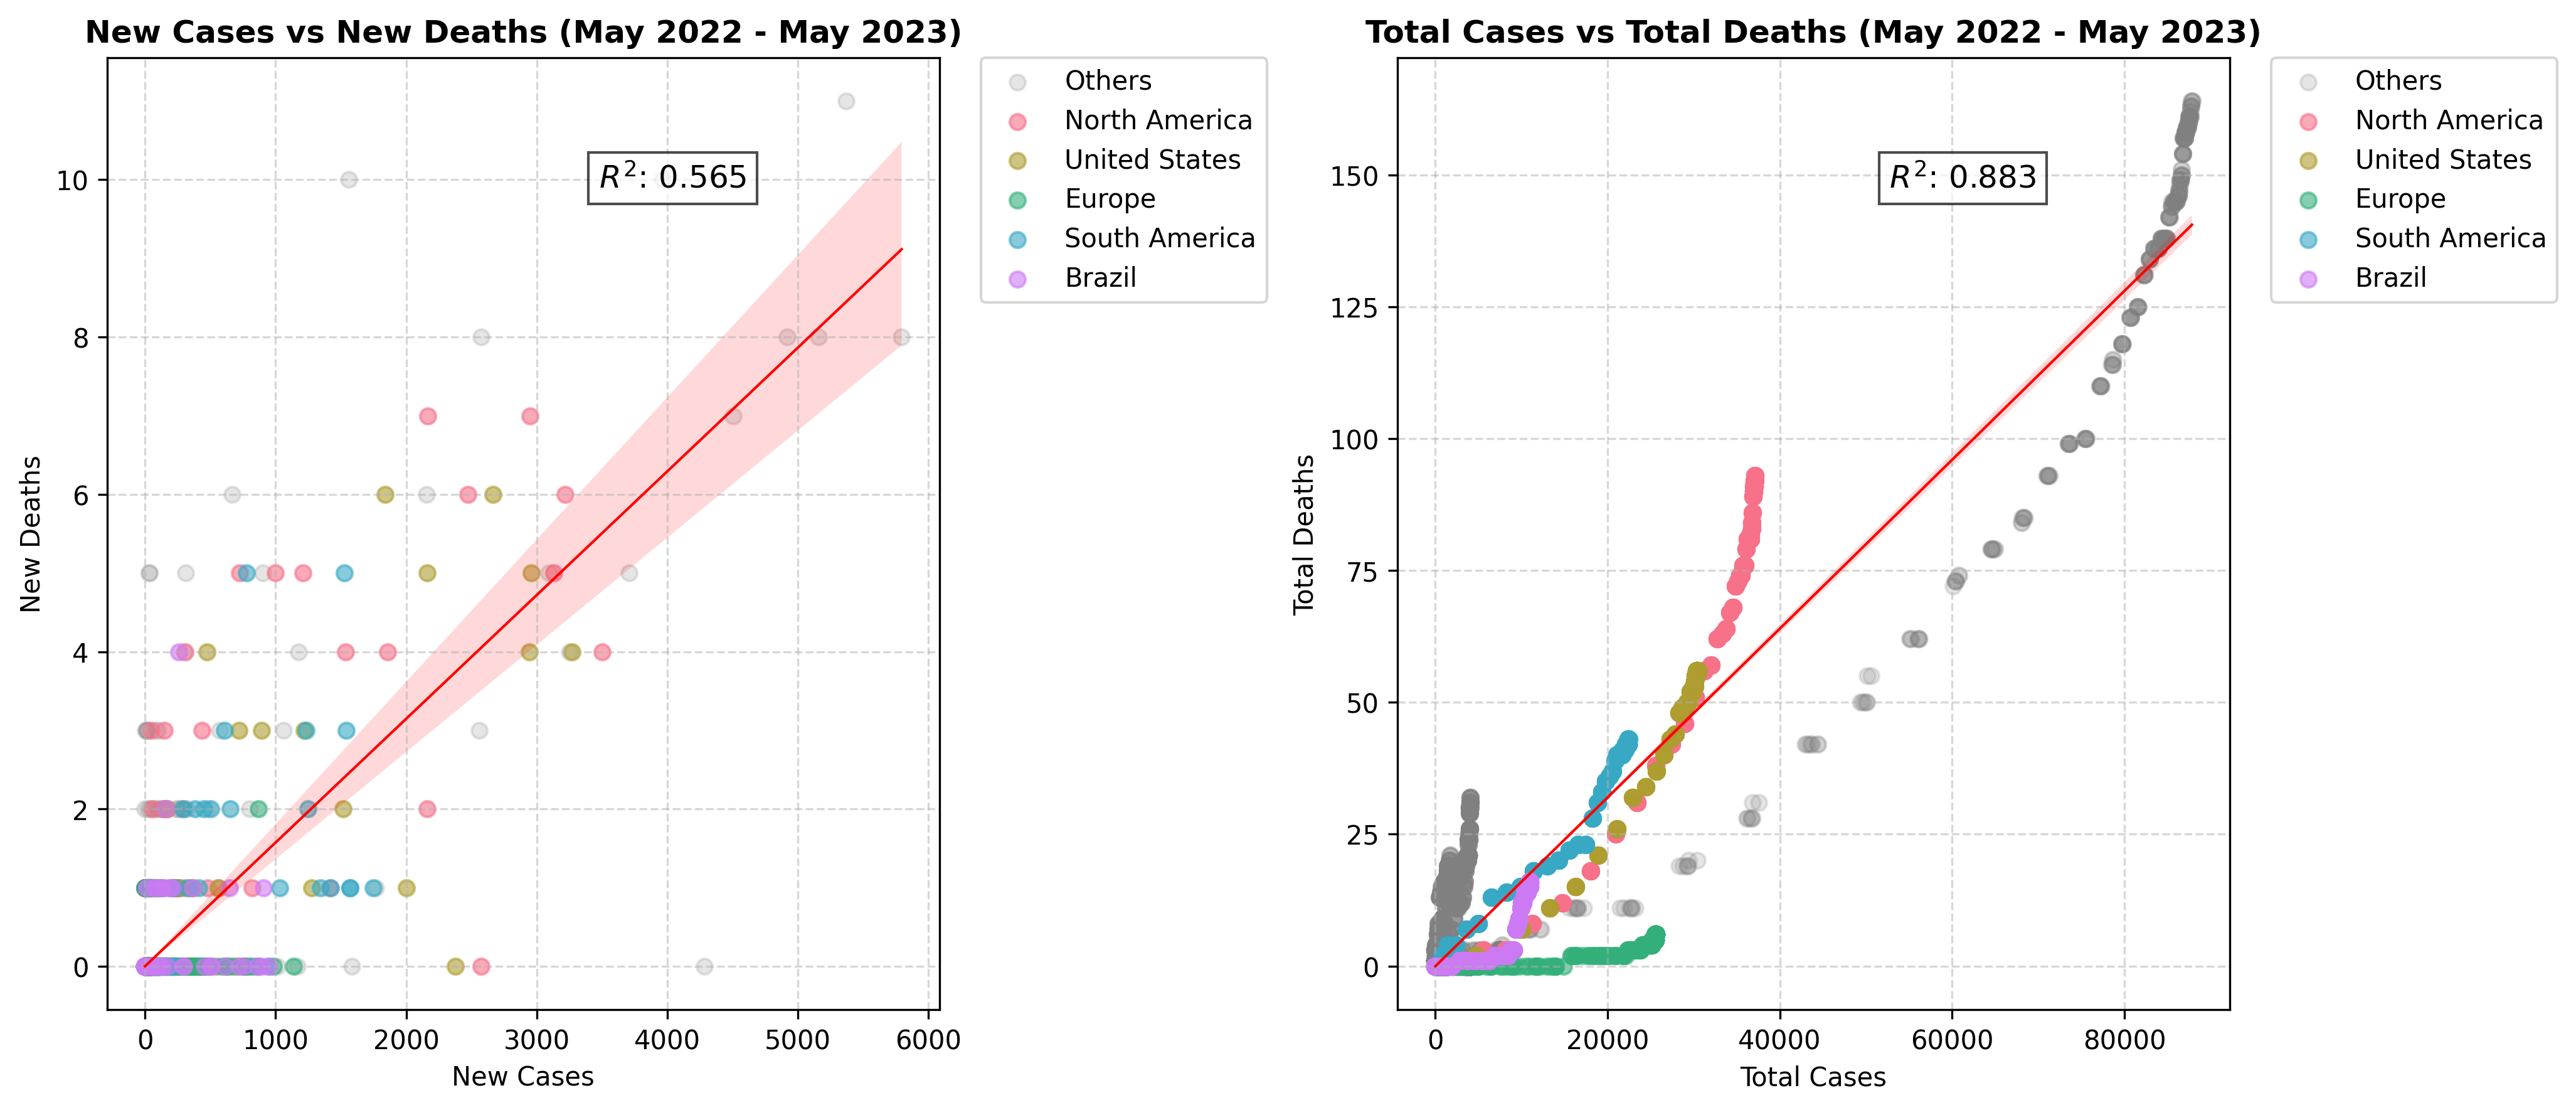

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the five regions/countries to highlight
highlighted_countries = ["North America", "United States", "Europe", "South America", "Brazil"]

# Create a color palette for the highlighted regions
color_palette = sns.color_palette("husl", n_colors=len(highlighted_countries))
country_colors = dict(zip(highlighted_countries, color_palette))

fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

# ---- First Plot: New Cases vs New Deaths ----
x1 = df_filtered["new_cases"]
y1 = df_filtered["new_deaths"]
y1_mean = np.mean(y1)

# Compute R-squared
ss_total1 = np.sum((y1 - y1_mean) ** 2)
ss_residual1 = np.sum((y1 - np.poly1d(np.polyfit(x1, y1, 1))(x1)) ** 2)
r2_1 = 1 - (ss_residual1 / ss_total1)

# Plot all other countries in gray
mask_others = ~df_filtered["location"].isin(highlighted_countries)
axes[0].scatter(df_filtered[mask_others]["new_cases"], 
                df_filtered[mask_others]["new_deaths"],
                c="gray", alpha=0.2, label="Others")

# Plot highlighted regions/countries
for country in highlighted_countries:
    mask = df_filtered["location"] == country
    axes[0].scatter(df_filtered[mask]["new_cases"], 
                   df_filtered[mask]["new_deaths"],
                   c=[country_colors[country]], 
                   label=country,
                   alpha=0.6)

# Add regression line
sns.regplot(data=df_filtered, y="new_deaths", x="new_cases",
            scatter=False, line_kws={"color": "red", "linewidth": 1}, 
            ax=axes[0])

# Add R-squared annotation
axes[0].text(x1.max() * 0.6, y1.max() * 0.9,
             s=f'$R^2$: {r2_1:.3f}',
             fontsize=12, color="black", 
             bbox=dict(facecolor="white", alpha=0.7))

axes[0].set_xlabel("New Cases")
axes[0].set_ylabel("New Deaths")
axes[0].set_title("New Cases vs New Deaths (May 2022 - May 2023)", fontweight='bold')
axes[0].grid(True, linestyle="--", alpha=0.5)

# ---- Second Plot: Total Cases vs Total Deaths ----
x2 = df_filtered["total_cases"]
y2 = df_filtered["total_deaths"]
y2_mean = np.mean(y2)

# Compute R-squared
ss_total2 = np.sum((y2 - y2_mean) ** 2)
ss_residual2 = np.sum((y2 - np.poly1d(np.polyfit(x2, y2, 1))(x2)) ** 2)
r2_2 = 1 - (ss_residual2 / ss_total2)

# Plot all other countries in gray
axes[1].scatter(df_filtered[mask_others]["total_cases"], 
                df_filtered[mask_others]["total_deaths"],
                c="gray", alpha=0.2, label="Others")

# Plot highlighted regions/countries
for country in highlighted_countries:
    mask = df_filtered["location"] == country
    axes[1].scatter(df_filtered[mask]["total_cases"], 
                   df_filtered[mask]["total_deaths"],
                   c=[country_colors[country]], 
                   label=country,
                   alpha=0.6)

# Add regression line
sns.regplot(data=df_filtered, y="total_deaths", x="total_cases",
            scatter=False, line_kws={"color": "red", "linewidth": 1}, 
            ax=axes[1])

# Add R-squared annotation
axes[1].text(x2.max() * 0.6, y2.max() * 0.9,
             s=f'$R^2$: {r2_2:.3f}',
             fontsize=12, color="black", 
             bbox=dict(facecolor="white", alpha=0.7))

axes[1].set_xlabel("Total Cases")
axes[1].set_ylabel("Total Deaths")
axes[1].set_title("Total Cases vs Total Deaths (May 2022 - May 2023)", fontweight='bold')
axes[1].grid(True, linestyle="--", alpha=0.5)

# Add legends
for ax in axes:
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Adjust layout
plt.tight_layout()

plt.subplots_adjust(right=0.85)  # Make room for the legend
plt.savefig("Plots/Scatter plot of New Cases and Deaths against Total Cases and Deaths(May 2022 - May 2023)", dpi=300, bbox_inches='tight')

plt.show()



- **ax[0]** - R squared (0.565) - only 56% of the variation in new deaths is caused by the new cases. Other factors (e.g., healthcare interventions, vaccination rates, regional differences) likely influence the number of deaths beyond just the new case count.  More scatter around the regression line means: Some countries may have high cases but low deaths due to effective healthcare. Some may have lower cases but higher deaths due to poor medical response.

- **ax[1]** - R squared is higher (0.883), the spread is tighter, meaning total deaths are more predictably linked to total cases.
This suggests long-term trends are more stable, whereas daily variations in new cases and deaths are less predictable.

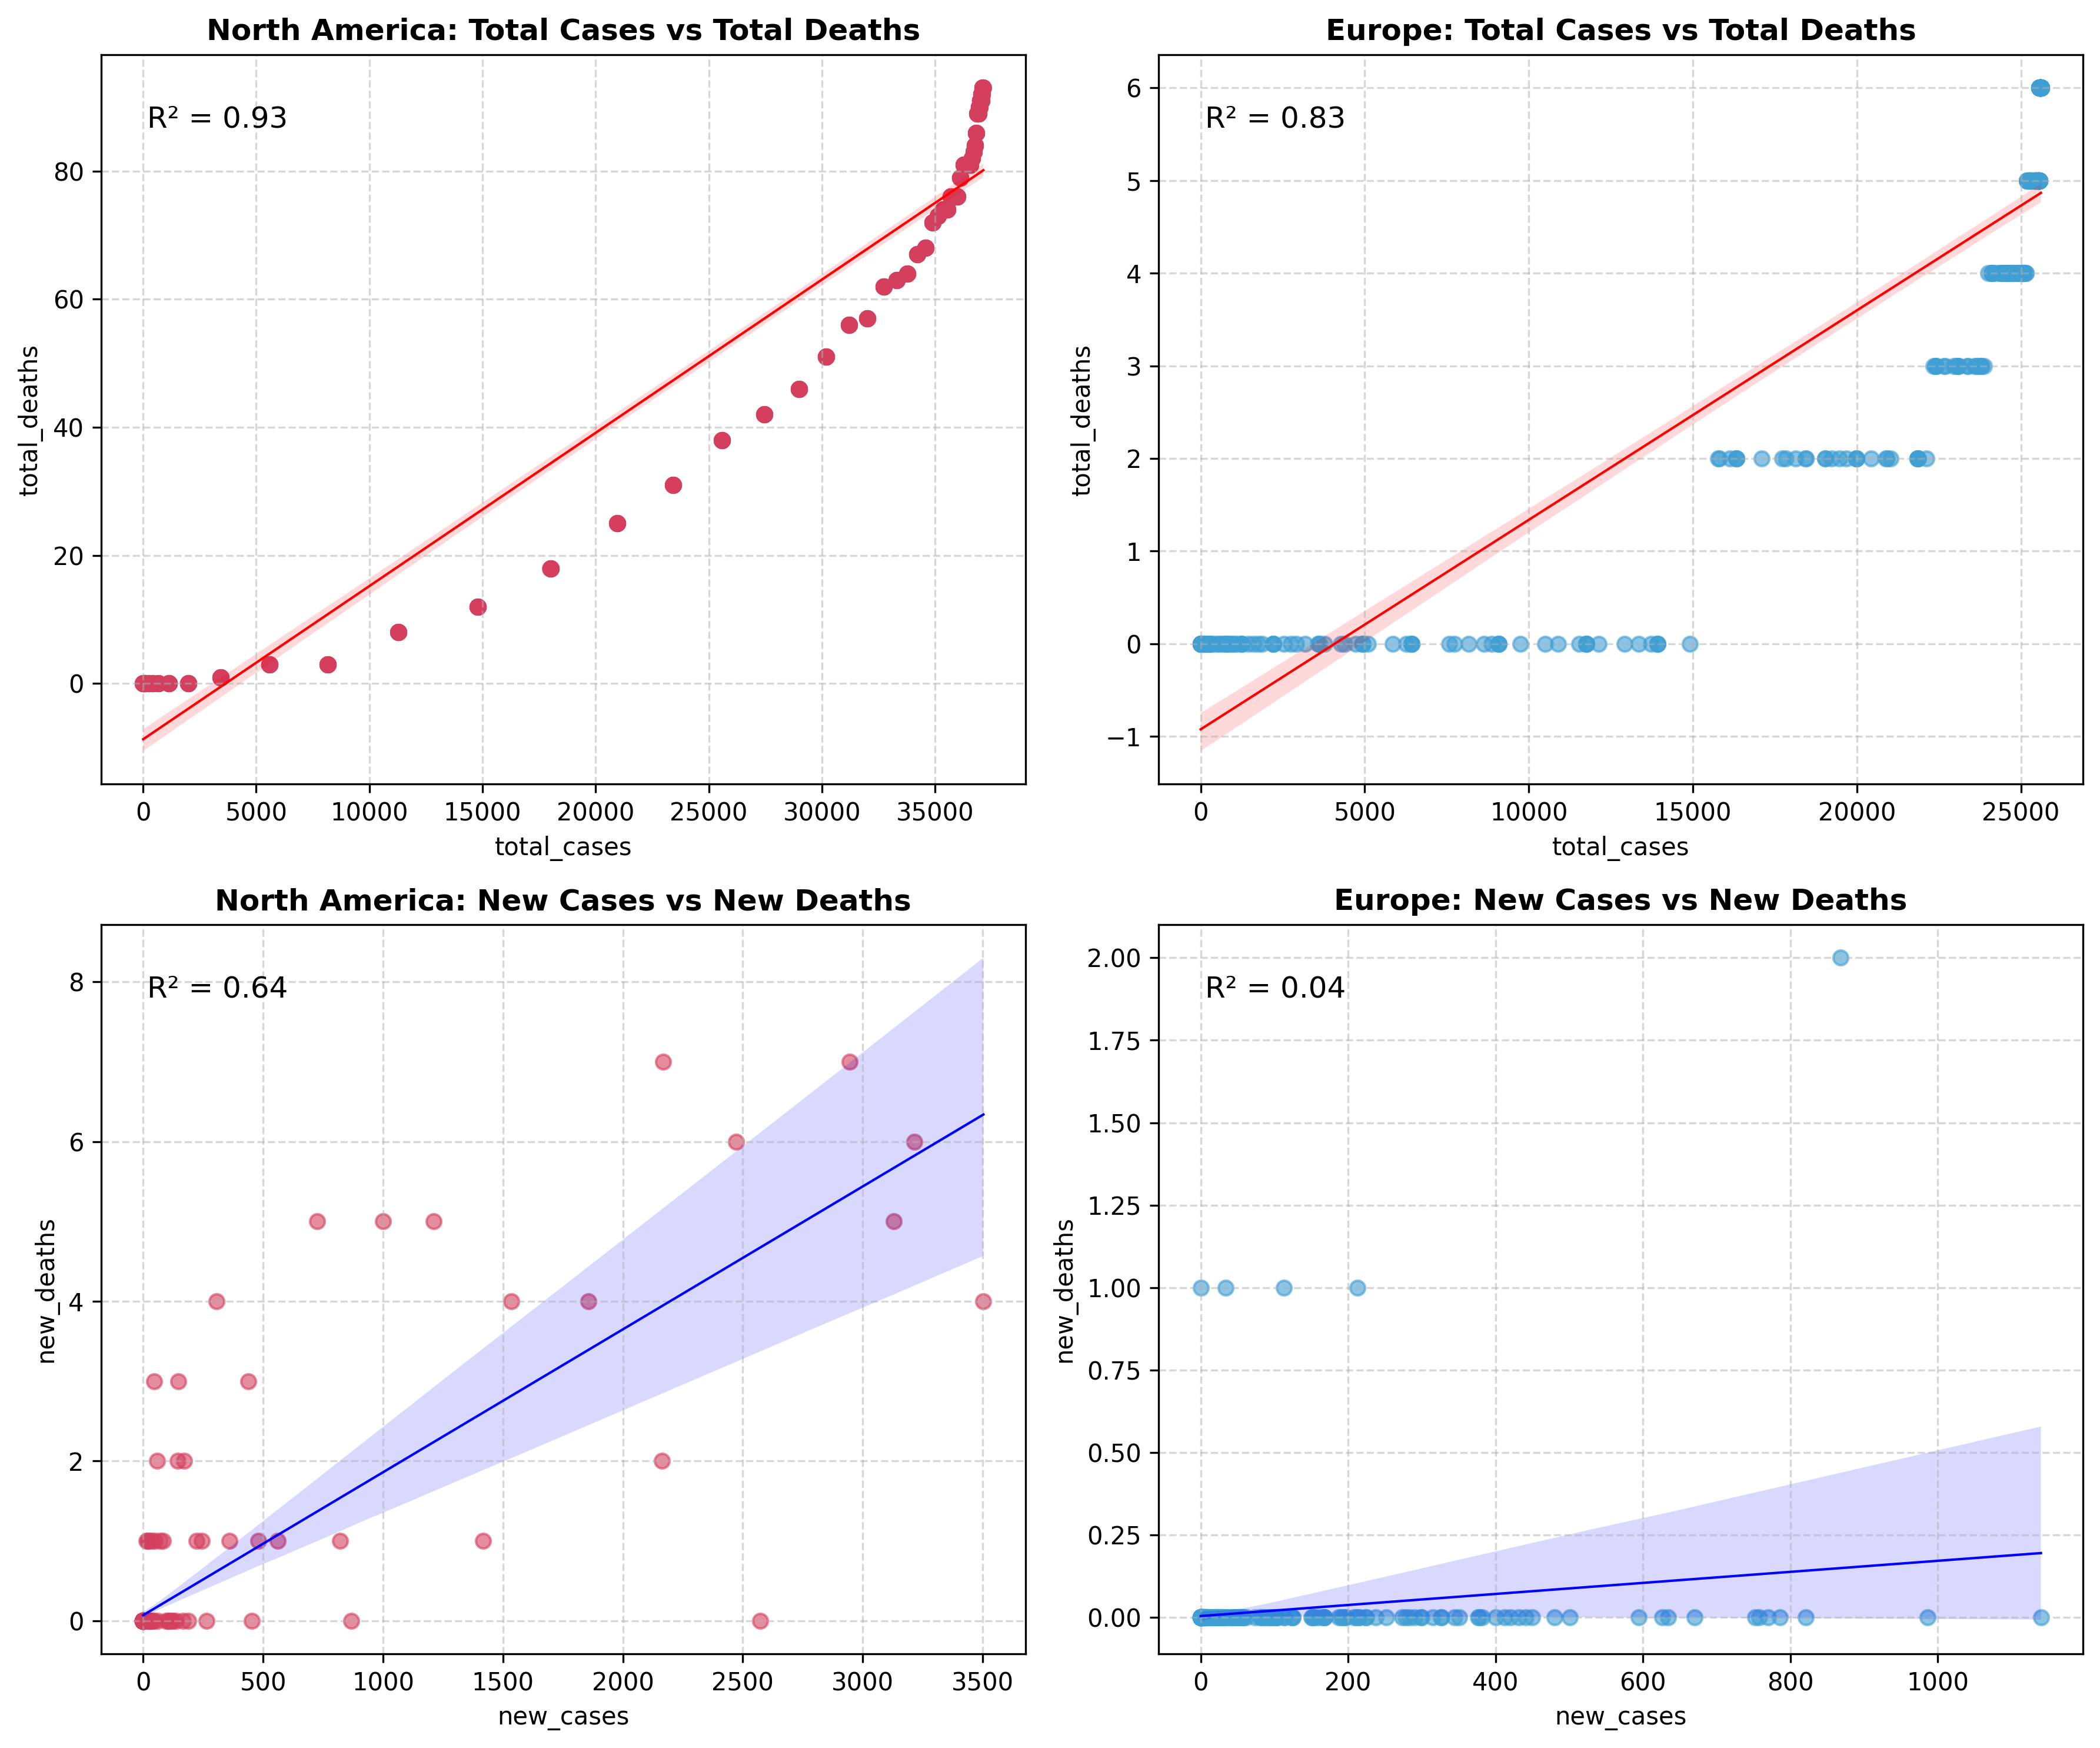

In [38]:
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# import numpy as np

# Filter data
df_north_america = df_filtered[df_filtered['location'] == 'North America']
df_europe = df_filtered[df_filtered['location'] == 'Europe']

# Function to compute R²
def compute_r2(x, y):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    return r2_score(y, y_pred)

# Compute R² for North America
r2_na_cases_deaths = compute_r2(df_north_america['total_cases'], df_north_america['total_deaths'])
r2_na_new_cases_deaths = compute_r2(df_north_america['new_cases'], df_north_america['new_deaths'])

# Compute R² for Europe
r2_eu_cases_deaths = compute_r2(df_europe['total_cases'], df_europe['total_deaths'])
r2_eu_new_cases_deaths = compute_r2(df_europe['new_cases'], df_europe['new_deaths'])

# Define colors
color_na = "#D43F5E"  # North America (golden-brown)
color_eu = "#3F9ED4"  # Europe (cyan/blue-green)

# Plot scatter plots with regression lines
fig, ax = plt.subplots(2, 2, figsize=(12, 10), dpi=300)

# Total Cases vs Total Deaths
sns.regplot(x='total_cases', y='total_deaths', data=df_north_america, ax=ax[0, 0], 
            scatter_kws={'alpha': 0.6, "color": color_na}, line_kws={"color": "red", "linewidth":1})
ax[0, 0].set_title(f'North America: Total Cases vs Total Deaths', fontweight='bold')
ax[0, 0].text(0.05, 0.9, f'R² = {r2_na_cases_deaths:.2f}', transform=ax[0, 0].transAxes, 
              fontsize=12, color='black', fontweight='regular')

sns.regplot(x='total_cases', y='total_deaths', data=df_europe, ax=ax[0, 1], 
            scatter_kws={'alpha': 0.6, "color": color_eu}, line_kws={"color": "red", "linewidth":1})
ax[0, 1].set_title(f'Europe: Total Cases vs Total Deaths', fontweight='bold')
ax[0, 1].text(0.05, 0.9, f'R² = {r2_eu_cases_deaths:.2f}', transform=ax[0, 1].transAxes, 
              fontsize=12, color='black', fontweight='regular')

# New Cases vs New Deaths
sns.regplot(x='new_cases', y='new_deaths', data=df_north_america, ax=ax[1, 0], 
            scatter_kws={'alpha': 0.6, "color": color_na}, line_kws={"color": "blue","linewidth":1})
ax[1, 0].set_title(f'North America: New Cases vs New Deaths', fontweight='bold')
ax[1, 0].text(0.05, 0.9, f'R² = {r2_na_new_cases_deaths:.2f}', transform=ax[1, 0].transAxes, 
              fontsize=12, color='black', fontweight='regular')

sns.regplot(x='new_cases', y='new_deaths', data=df_europe, ax=ax[1, 1], 
            scatter_kws={'alpha': 0.6, "color": color_eu}, line_kws={"color": "blue","linewidth":1})
ax[1, 1].set_title(f'Europe: New Cases vs New Deaths', fontweight='bold')
ax[1, 1].text(0.05, 0.9, f'R² = {r2_eu_new_cases_deaths:.2f}', transform=ax[1, 1].transAxes, 
              fontsize=12, color='black', fontweight='regular')

# Add grid for readability
for i in range(2):
    for j in range(2):
        ax[i, j].grid(True, linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.savefig("Plots/Scatter plot North America vs Europe.png", dpi=300, bbox_inches='tight')
plt.show()



- **ax[0,0]** - R2(0.93)- Strong correlation, 93% of the variation of total deaths is caused by total cases in North America. The spread is tighter, meaning total deaths are more predictably linked to total cases.
- **ax[0,1]** - R2(0.83), 83% of the variation of total deaths in Europe is cased by the total cases. The distribution of data points suggests some variability — possibly due to better healthcare systems or different reporting methods.
- **ax[1,0]** - R2(0.64)- Moderate correlation, Only 63% of the variance in new deaths can be explained by new cases.This suggests that daily variations in new cases and deaths are less predictable.However, some spread in the data suggests external factors affecting new deaths (e.g., medical interventions, reporting delays). likely influence the number of deaths beyond just the new case count
- **ax[1,1]** - R2(0.04) - Very weak correlation, 0.04% of the variation of new deaths is caused by new cases. New cases do not strongly predict new deaths.some factors could include: Fewer severe cases, More effective treatments, Delayed reporting of deaths, Different testing and counting methodologies
